#Prepare a model for glass classification using KNN

In [1]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [5]:
import pandas as pd
# Read the Excel file
df = pd.read_csv('glass.csv')
# Display the first few rows of the dataset
df


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA

In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# Summary statistics of the numerical columns
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.shape

(214, 10)

# to remove duplicated values

In [7]:
#finding duplicates
df.duplicated().sum()

1

In [8]:
#Print the duplicated values
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
#Drop Duplicated records
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

# To deal with missing values

In [11]:
#finding missing values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [12]:
desired_columns = ['K', 'Ba', 'Fe']
extracted_data = df[desired_columns]

In [13]:
import numpy as np

In [14]:
columns_to_replace = ['K', 'Ba', 'Fe']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

In [15]:
df.isna().sum()

RI        0
Na        0
Mg        0
Al        0
Si        0
K        30
Ca        0
Ba      175
Fe      143
Type      0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['K', 'Ba', 'Fe']
si = SimpleImputer(strategy='median')

df[columns_to_impute] = si.fit_transform(df[columns_to_impute])


In [17]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

#Analysing data

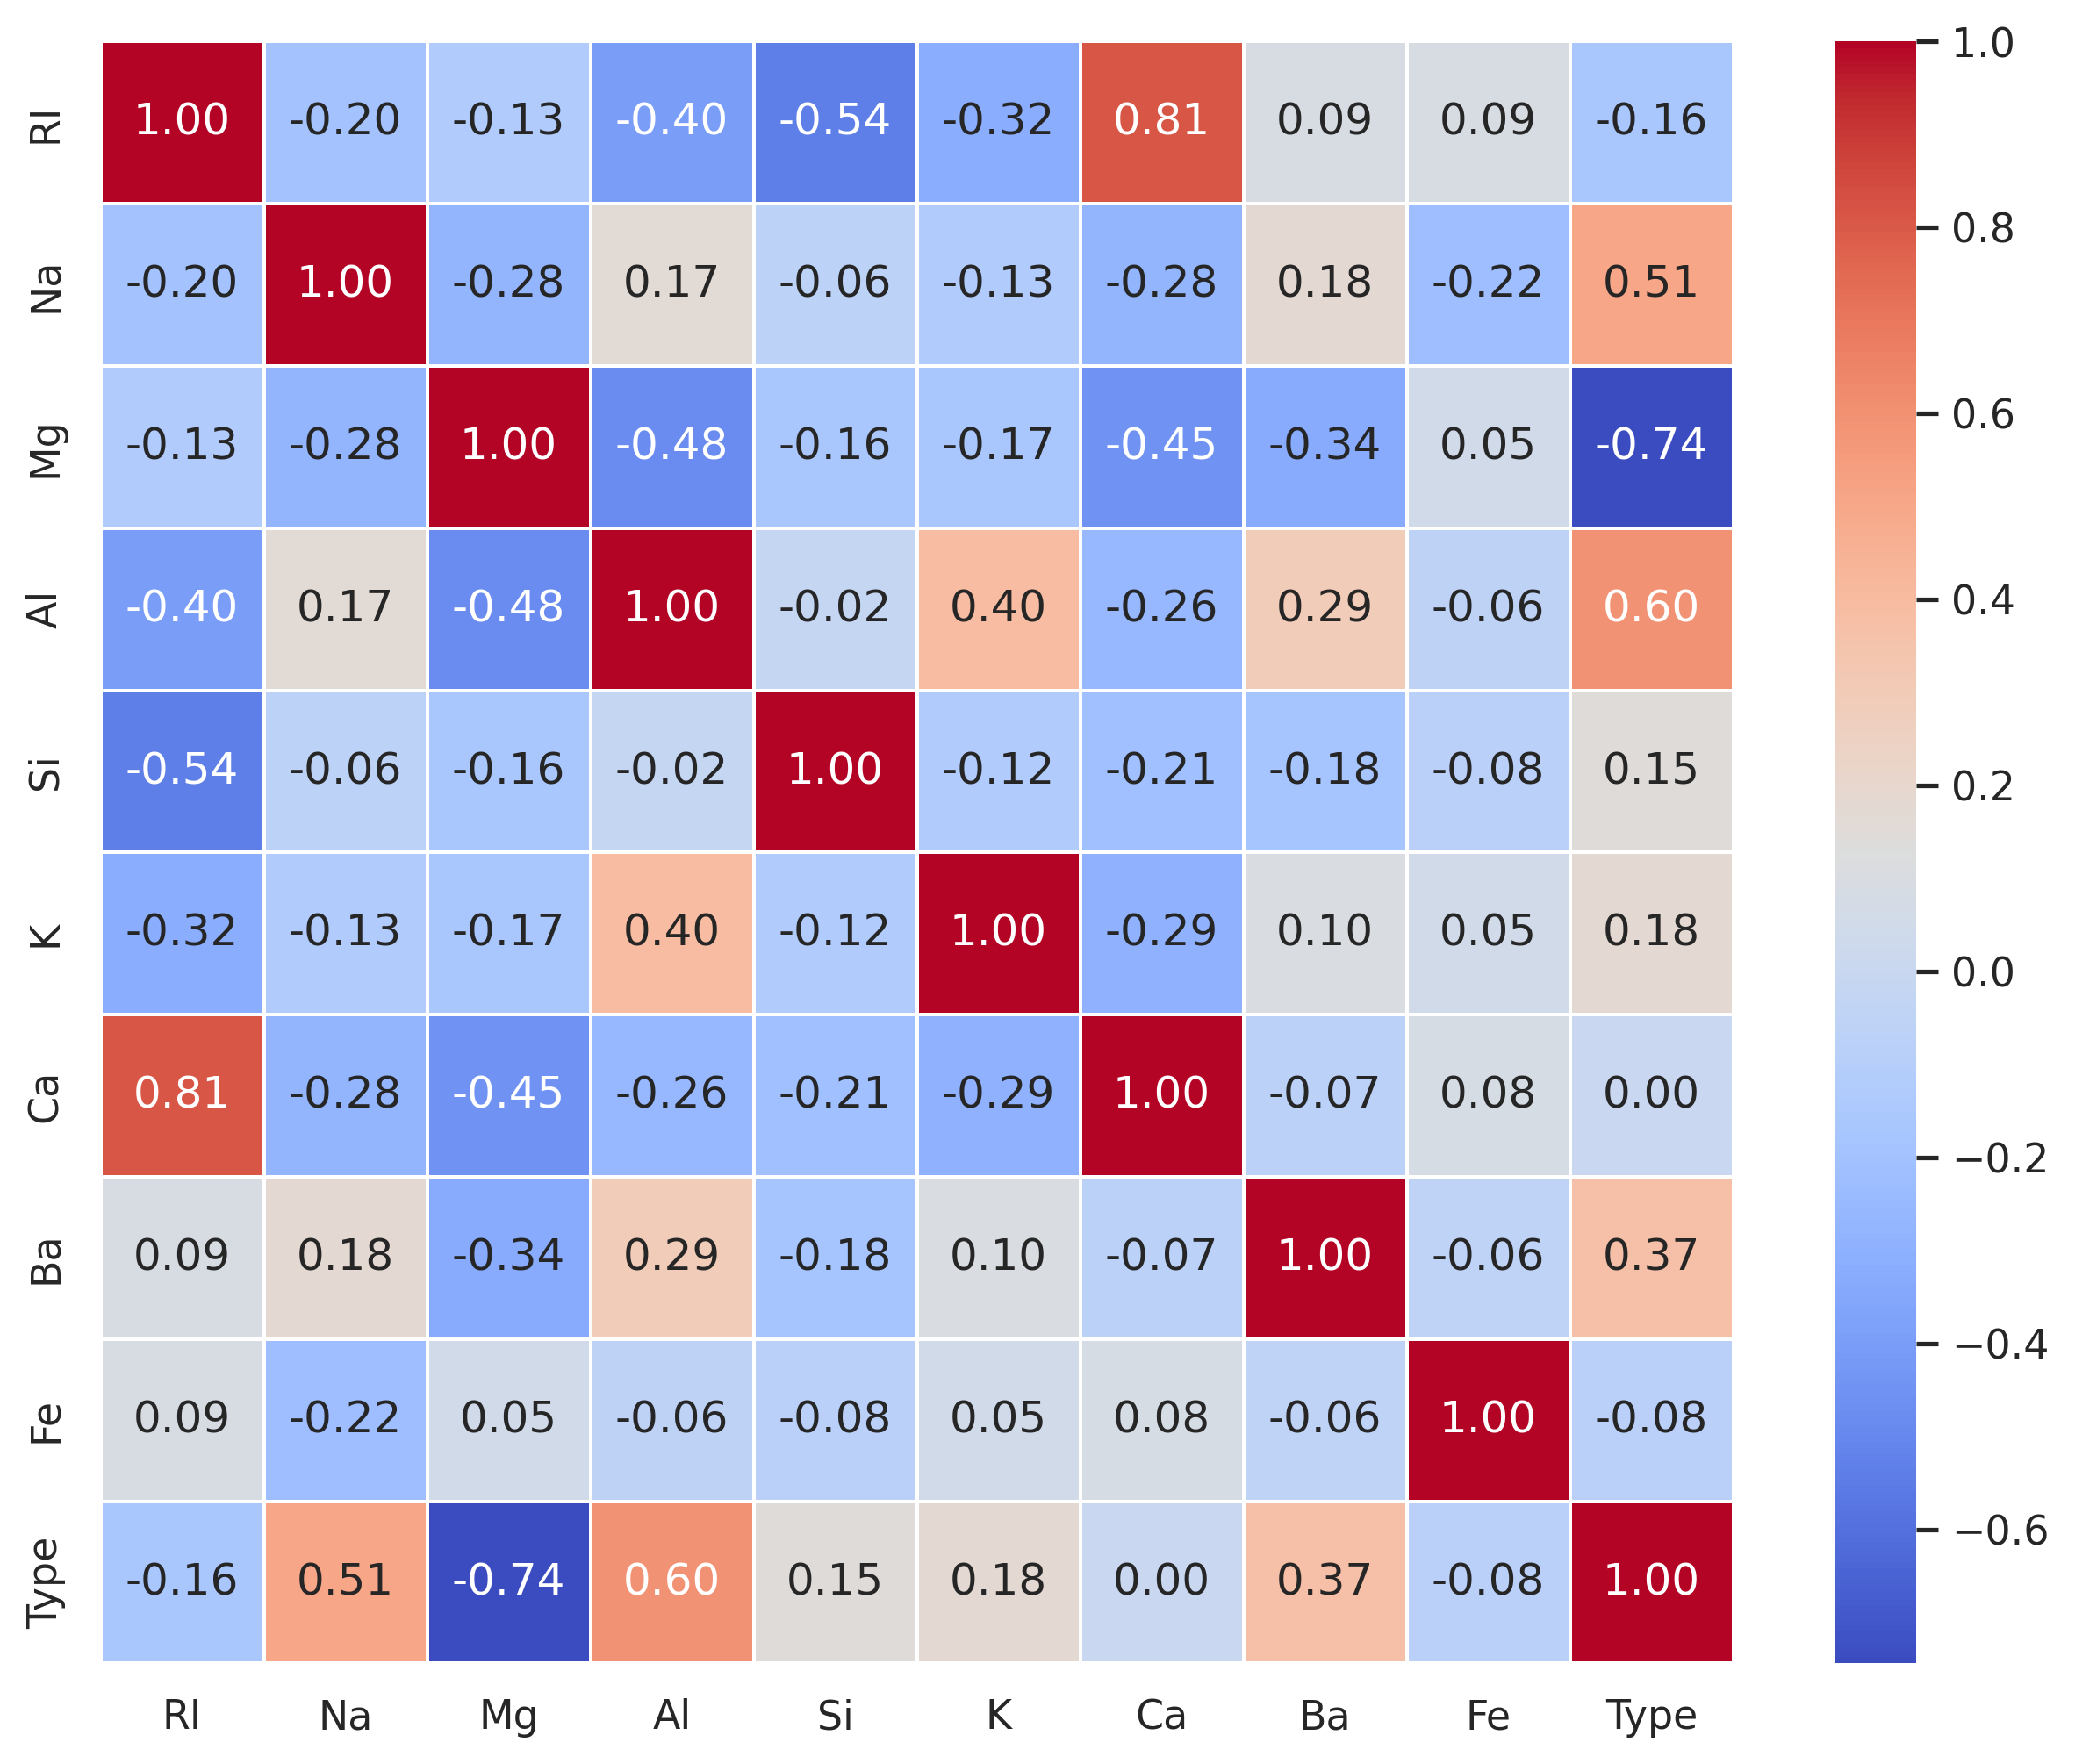

In [18]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include="number").corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Create a heatmap with a color map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# Show the plot
plt.show()

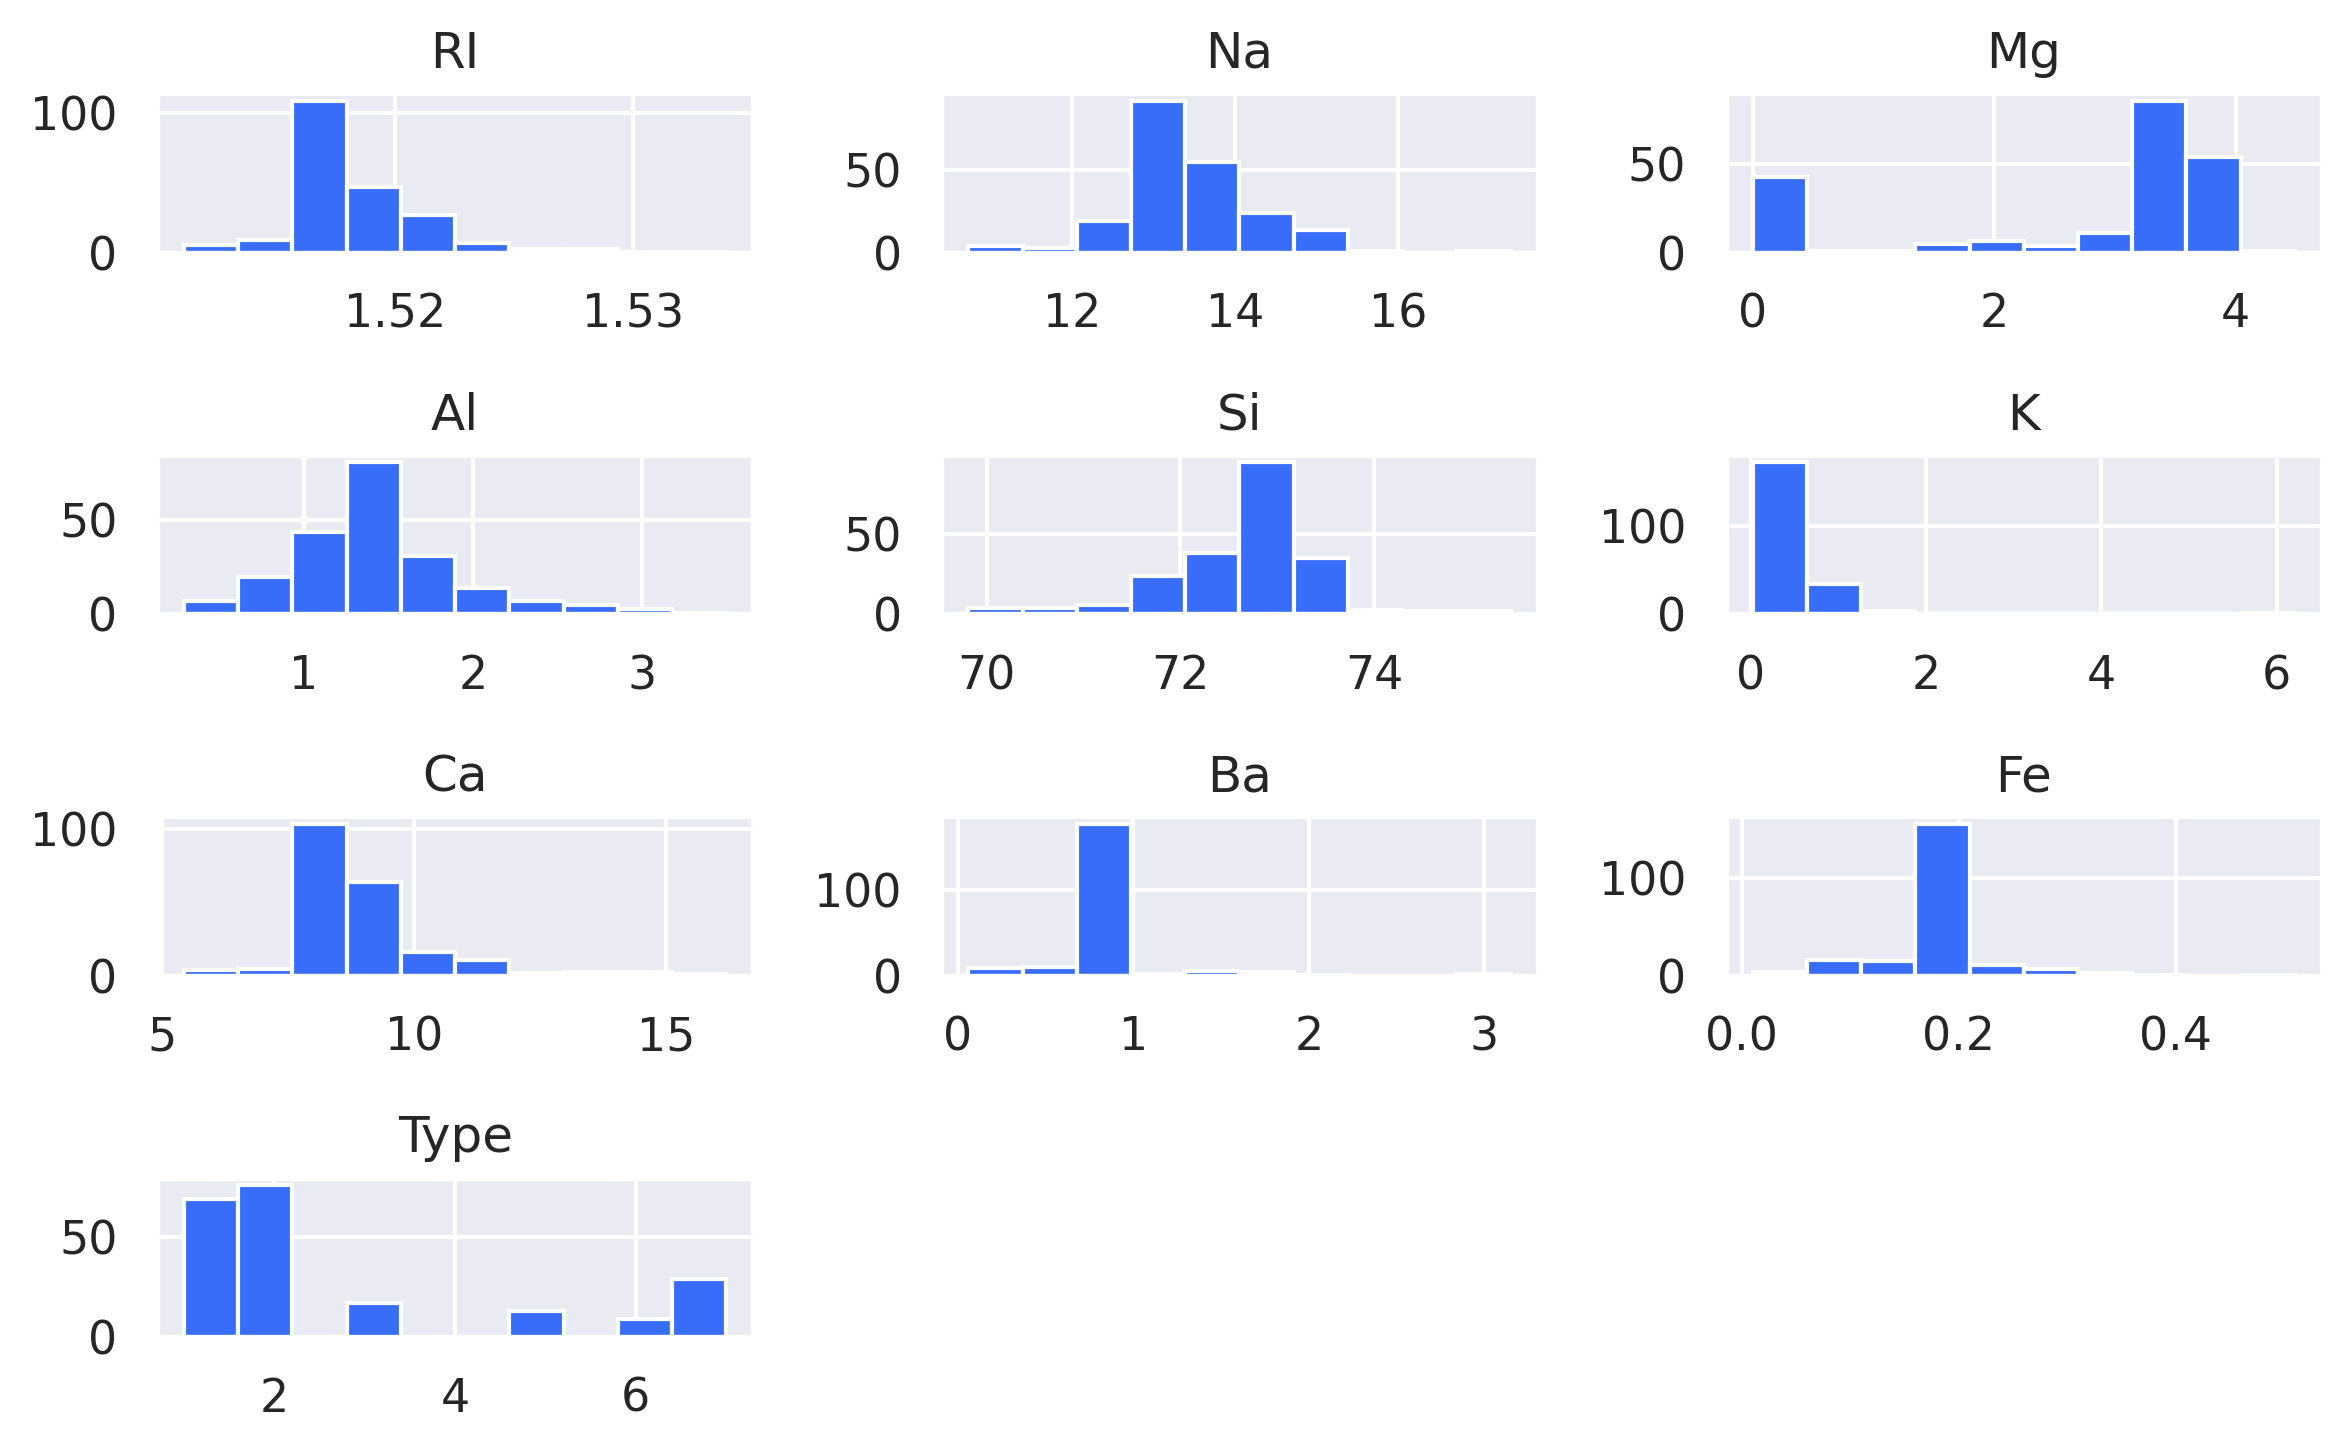

In [19]:
df.hist()
plt.tight_layout()

In [9]:
variables_to_plot =['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

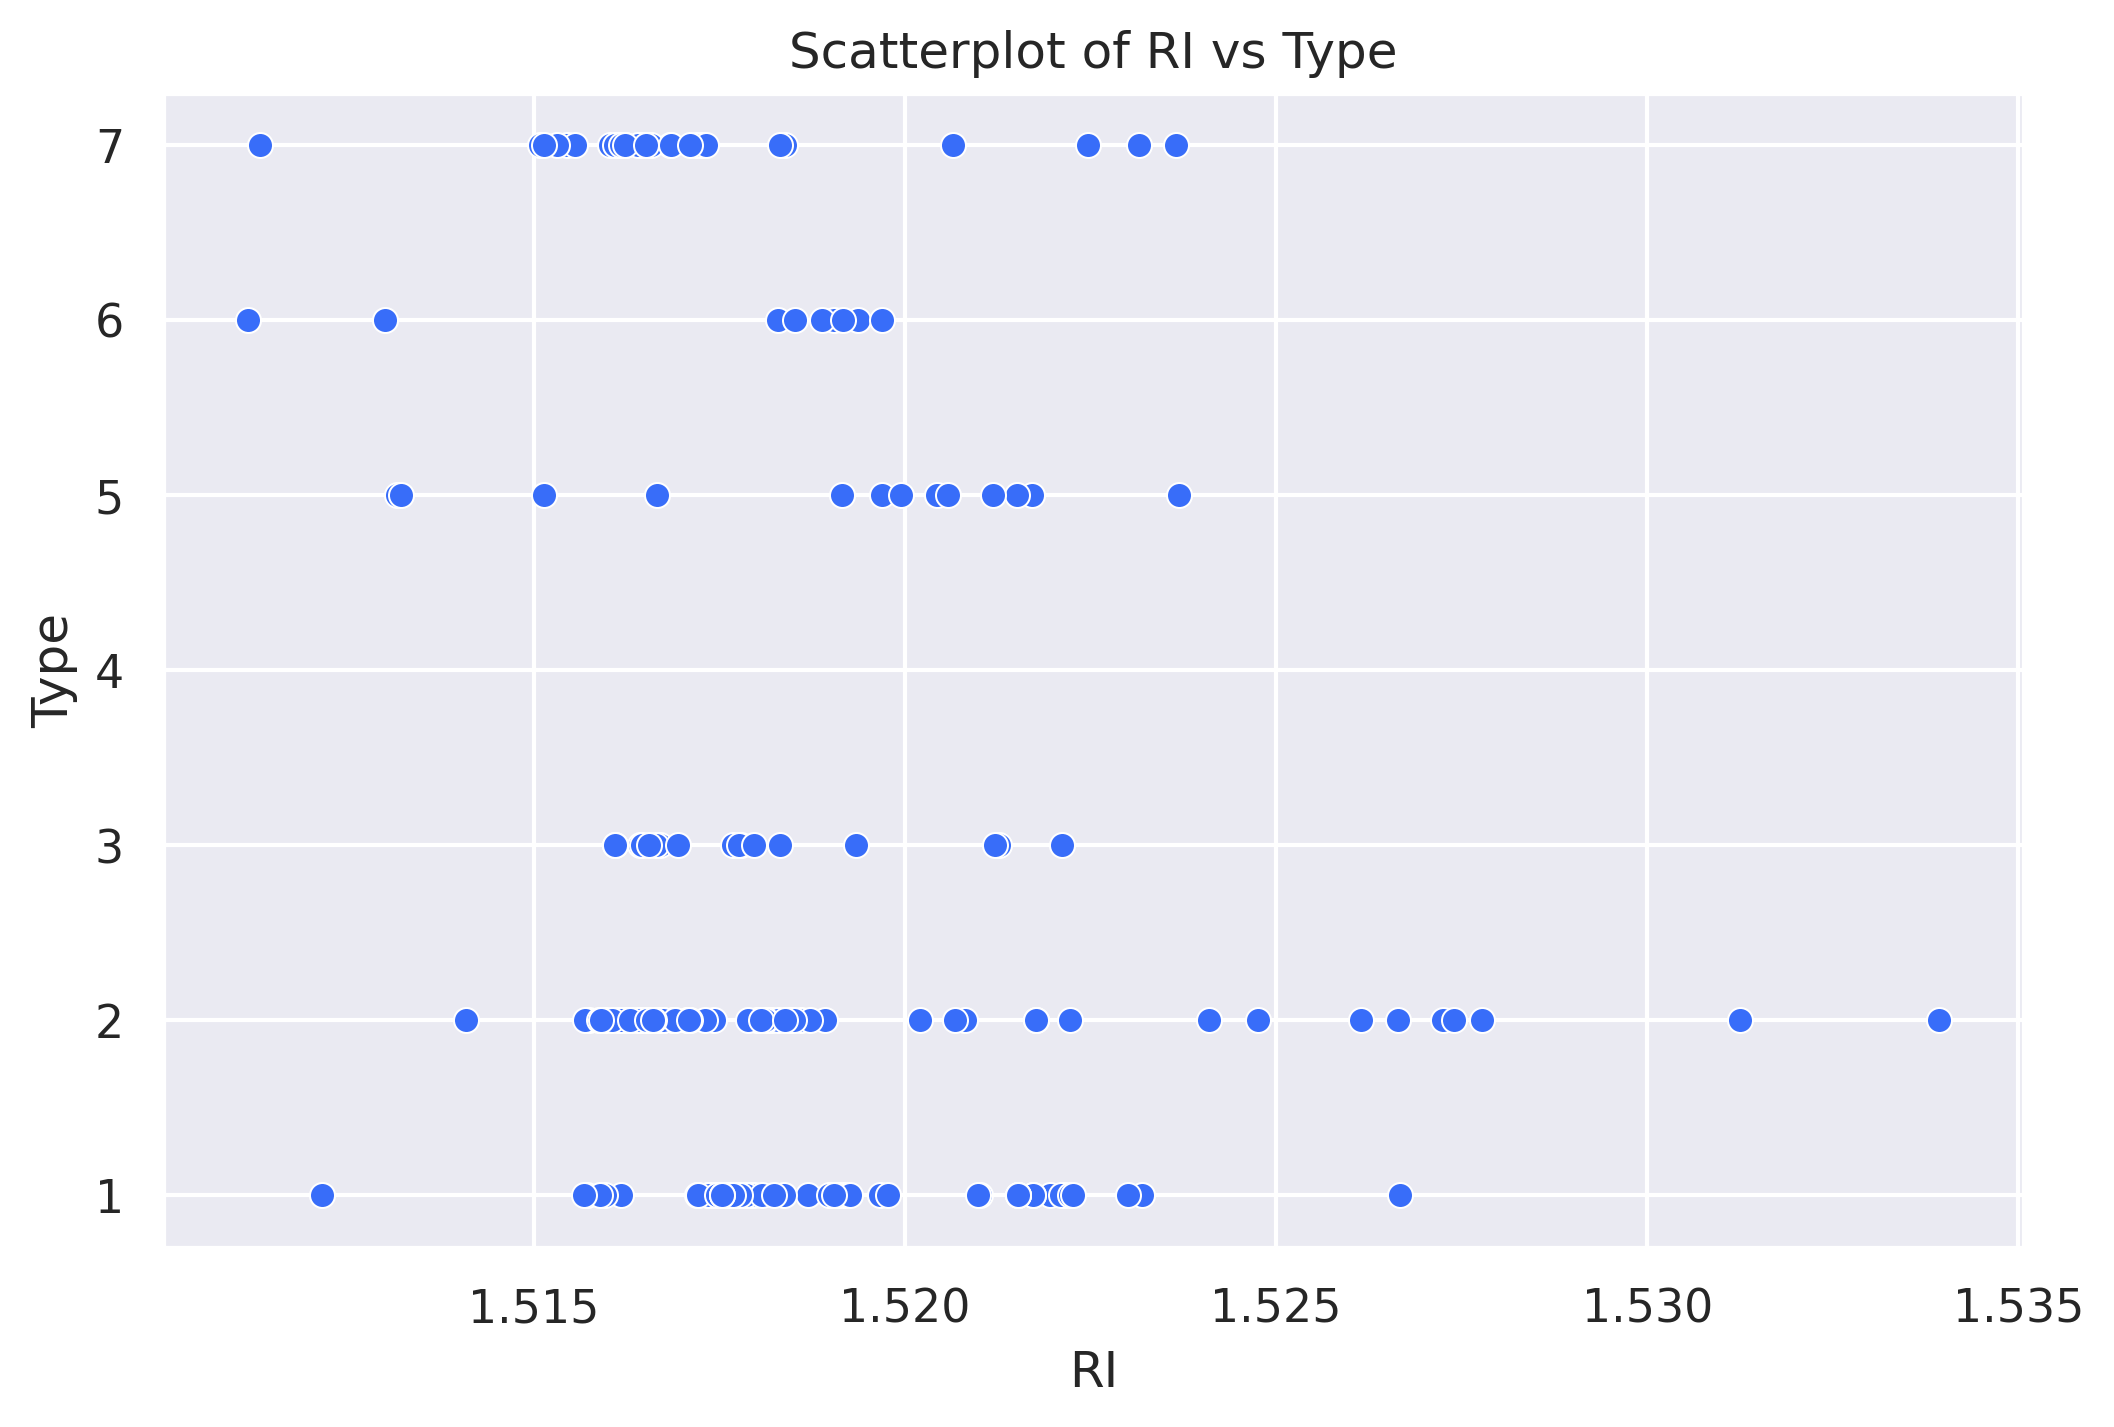

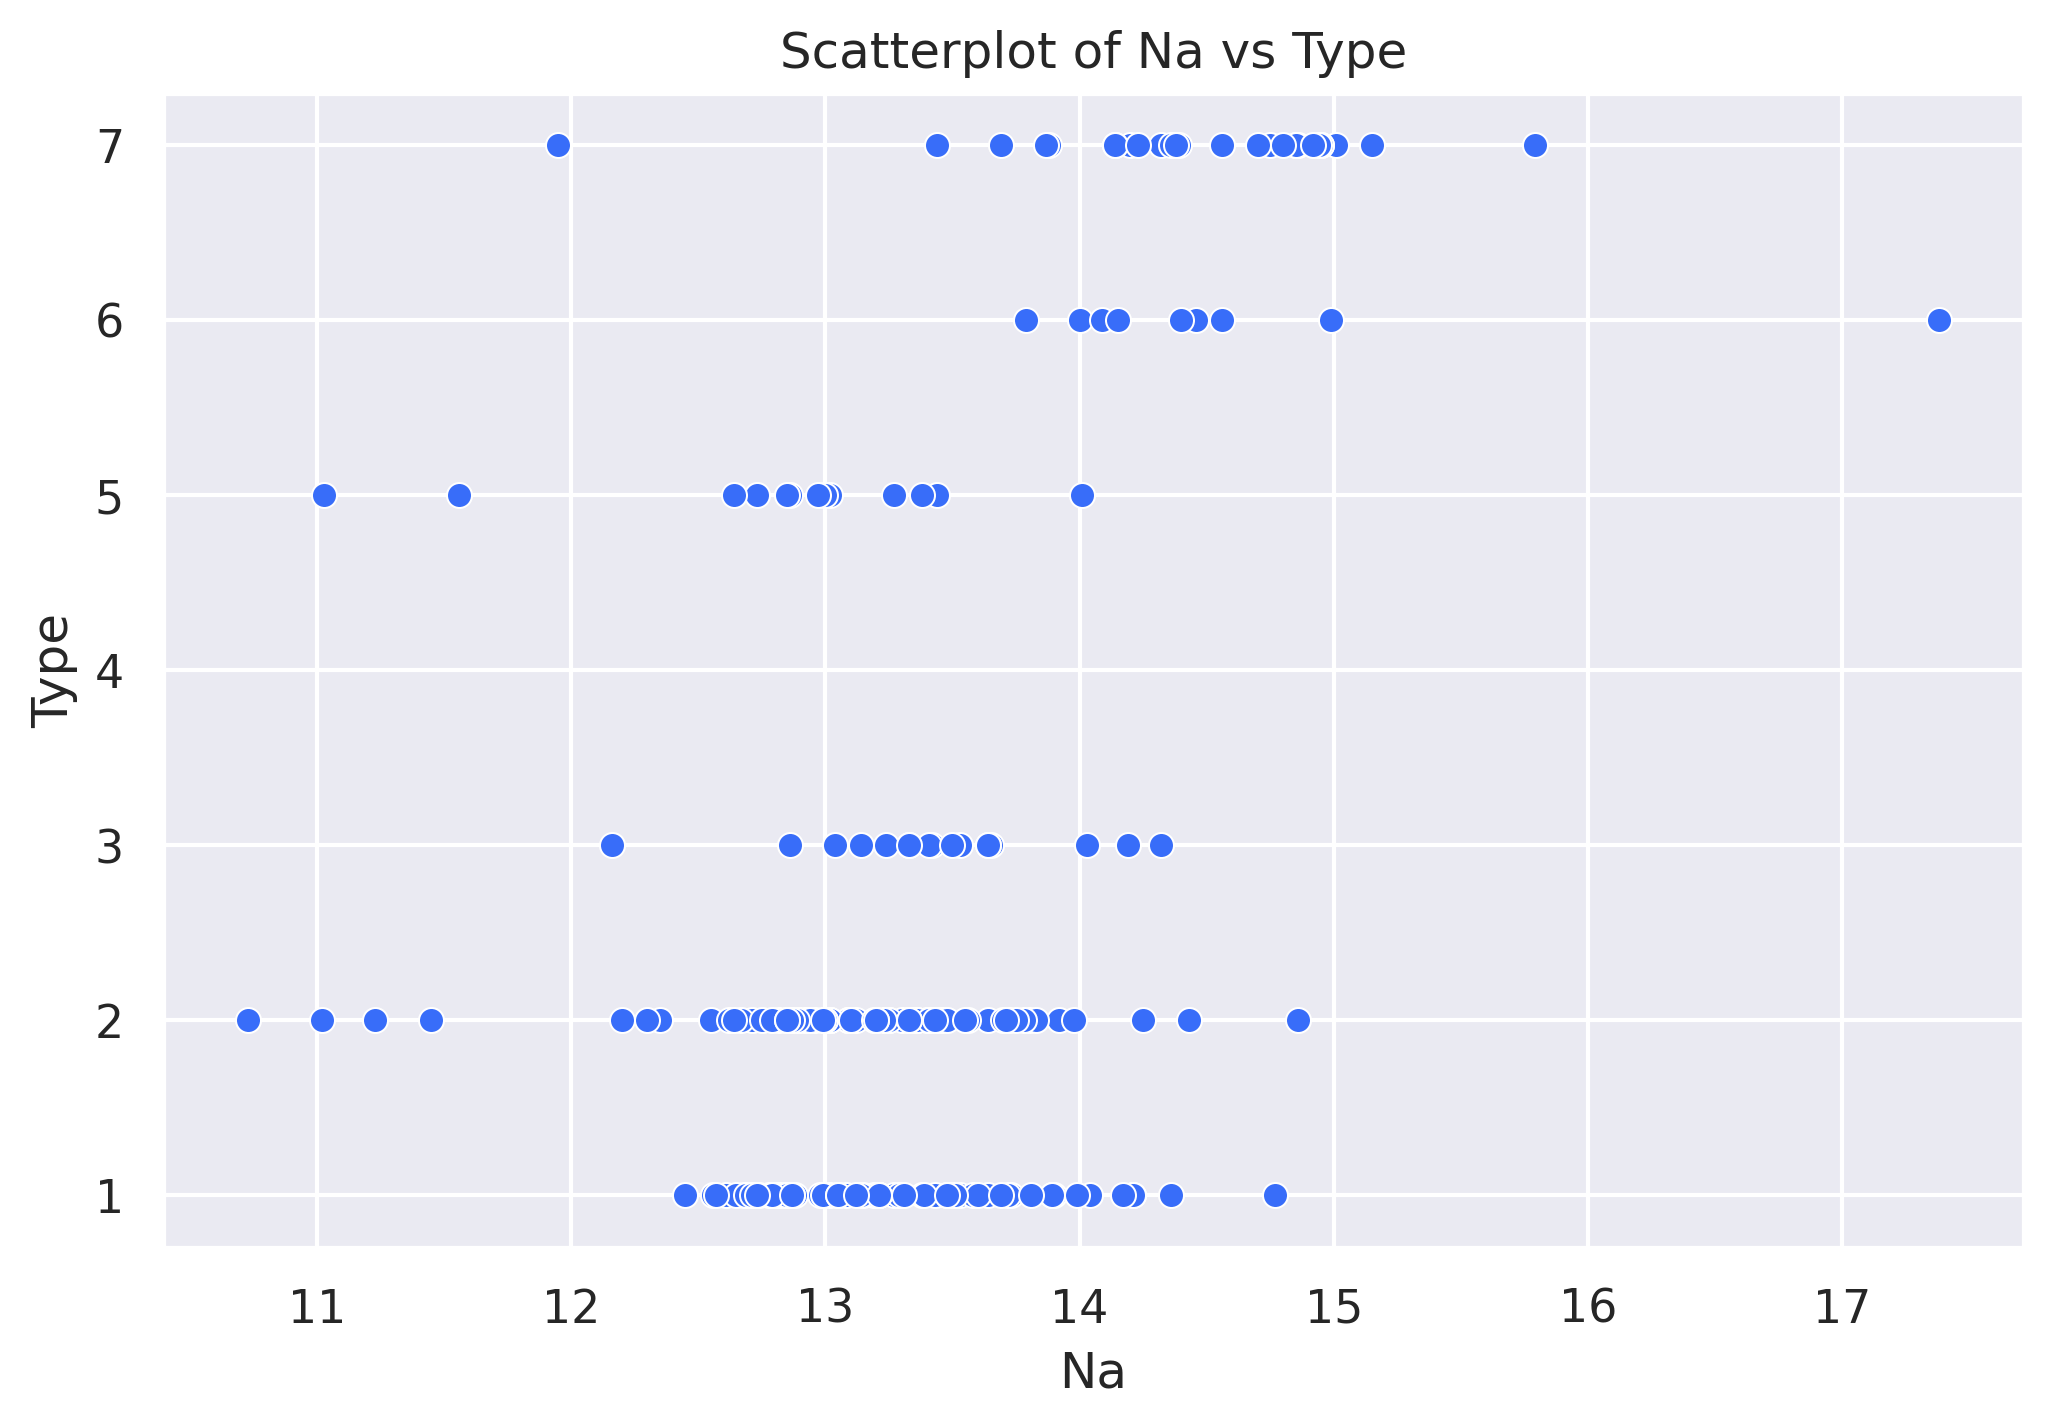

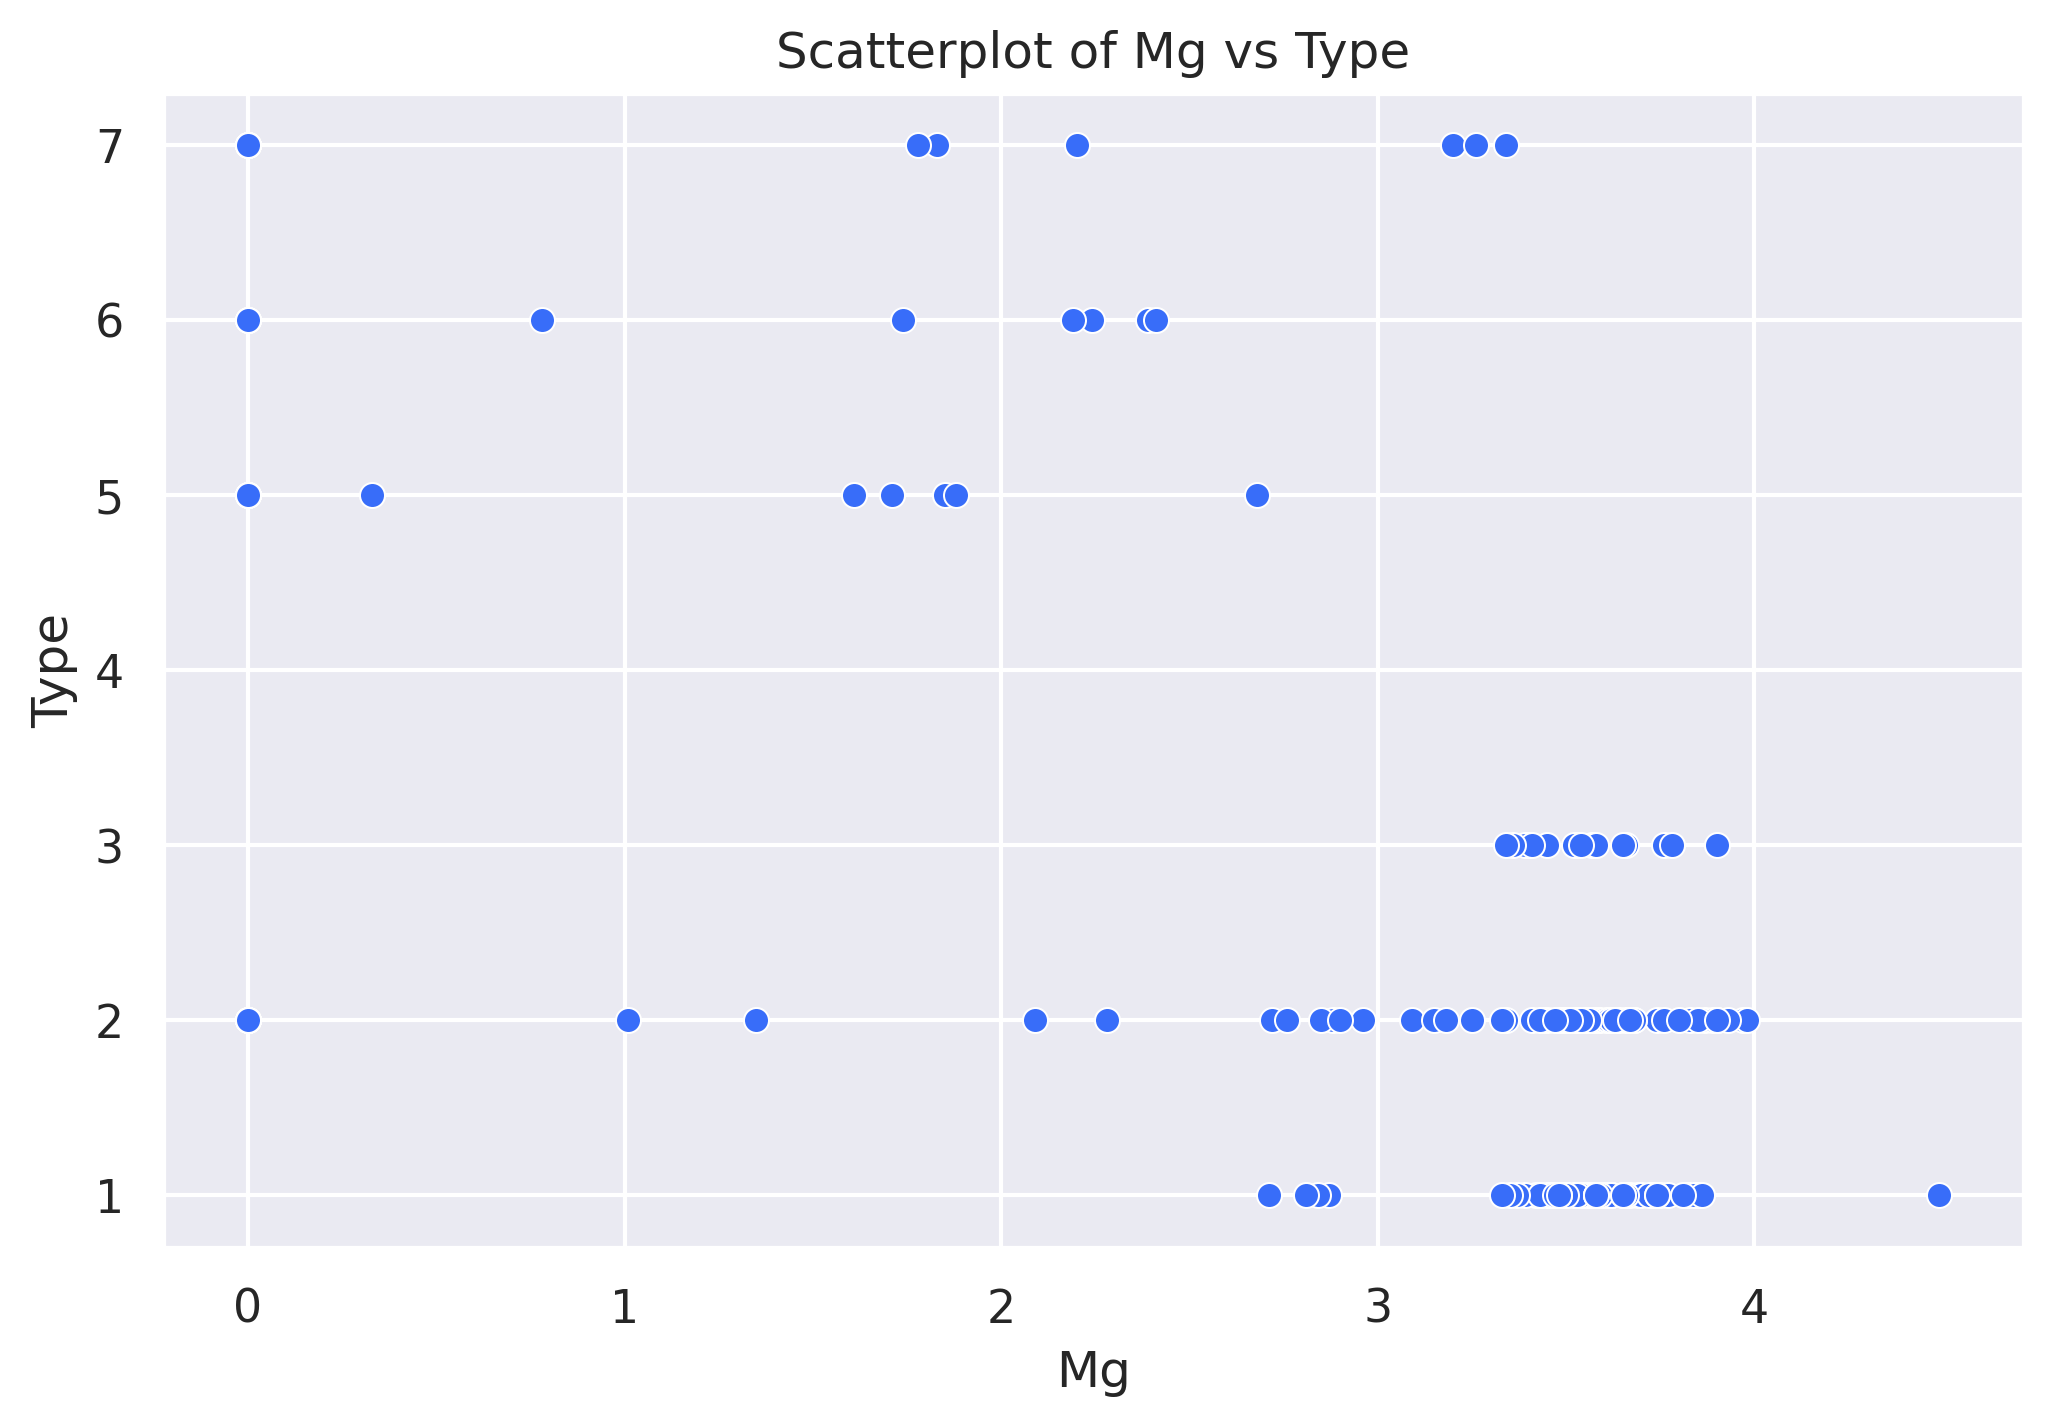

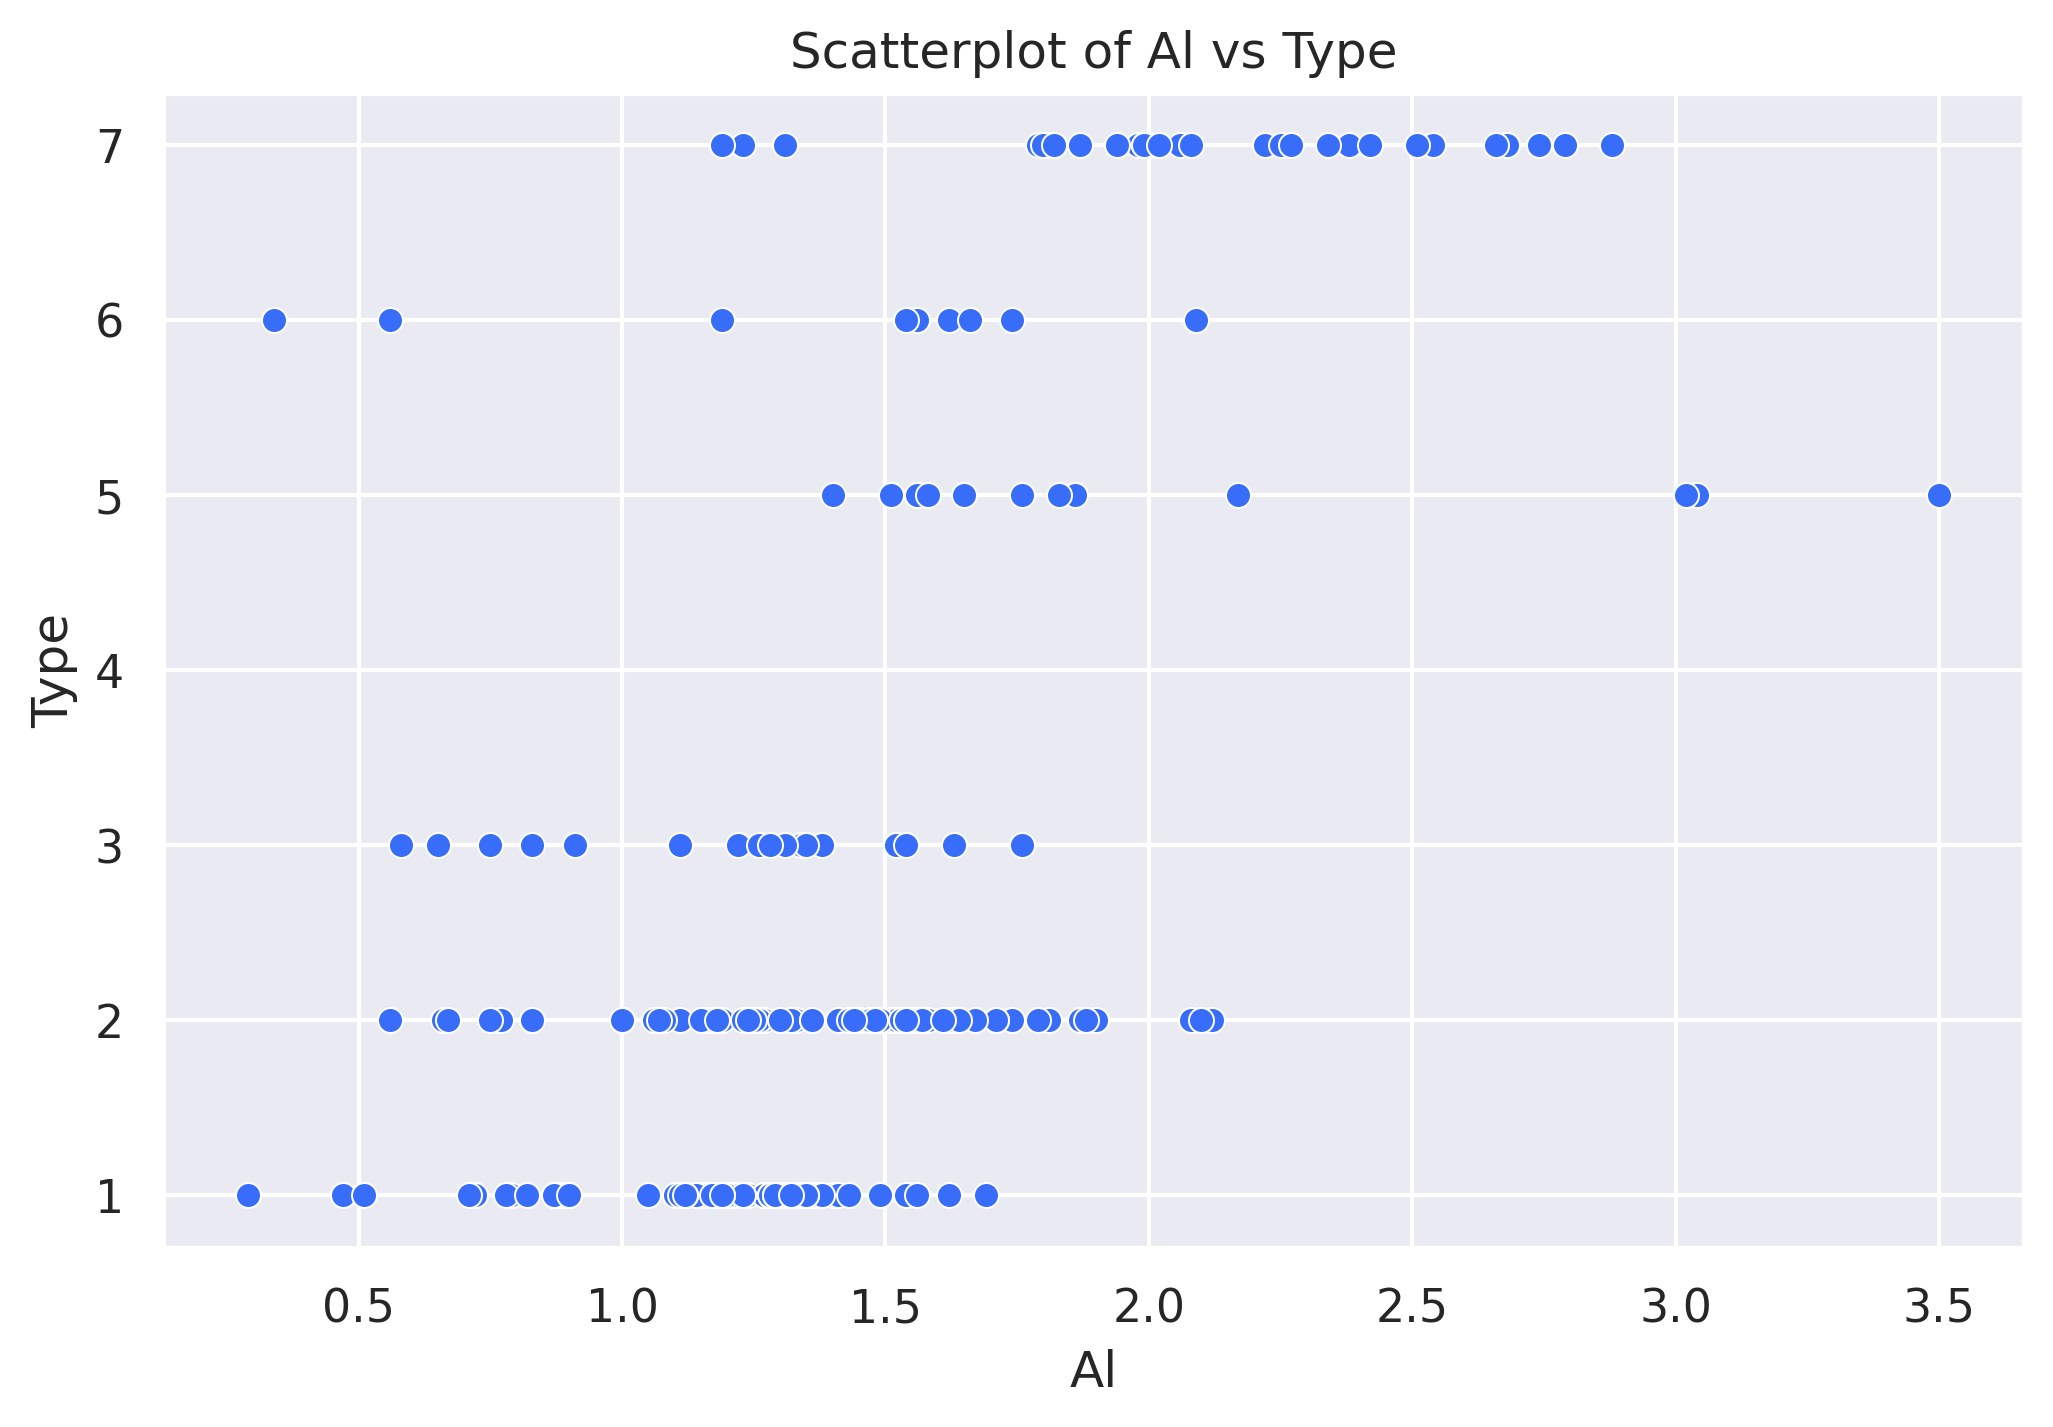

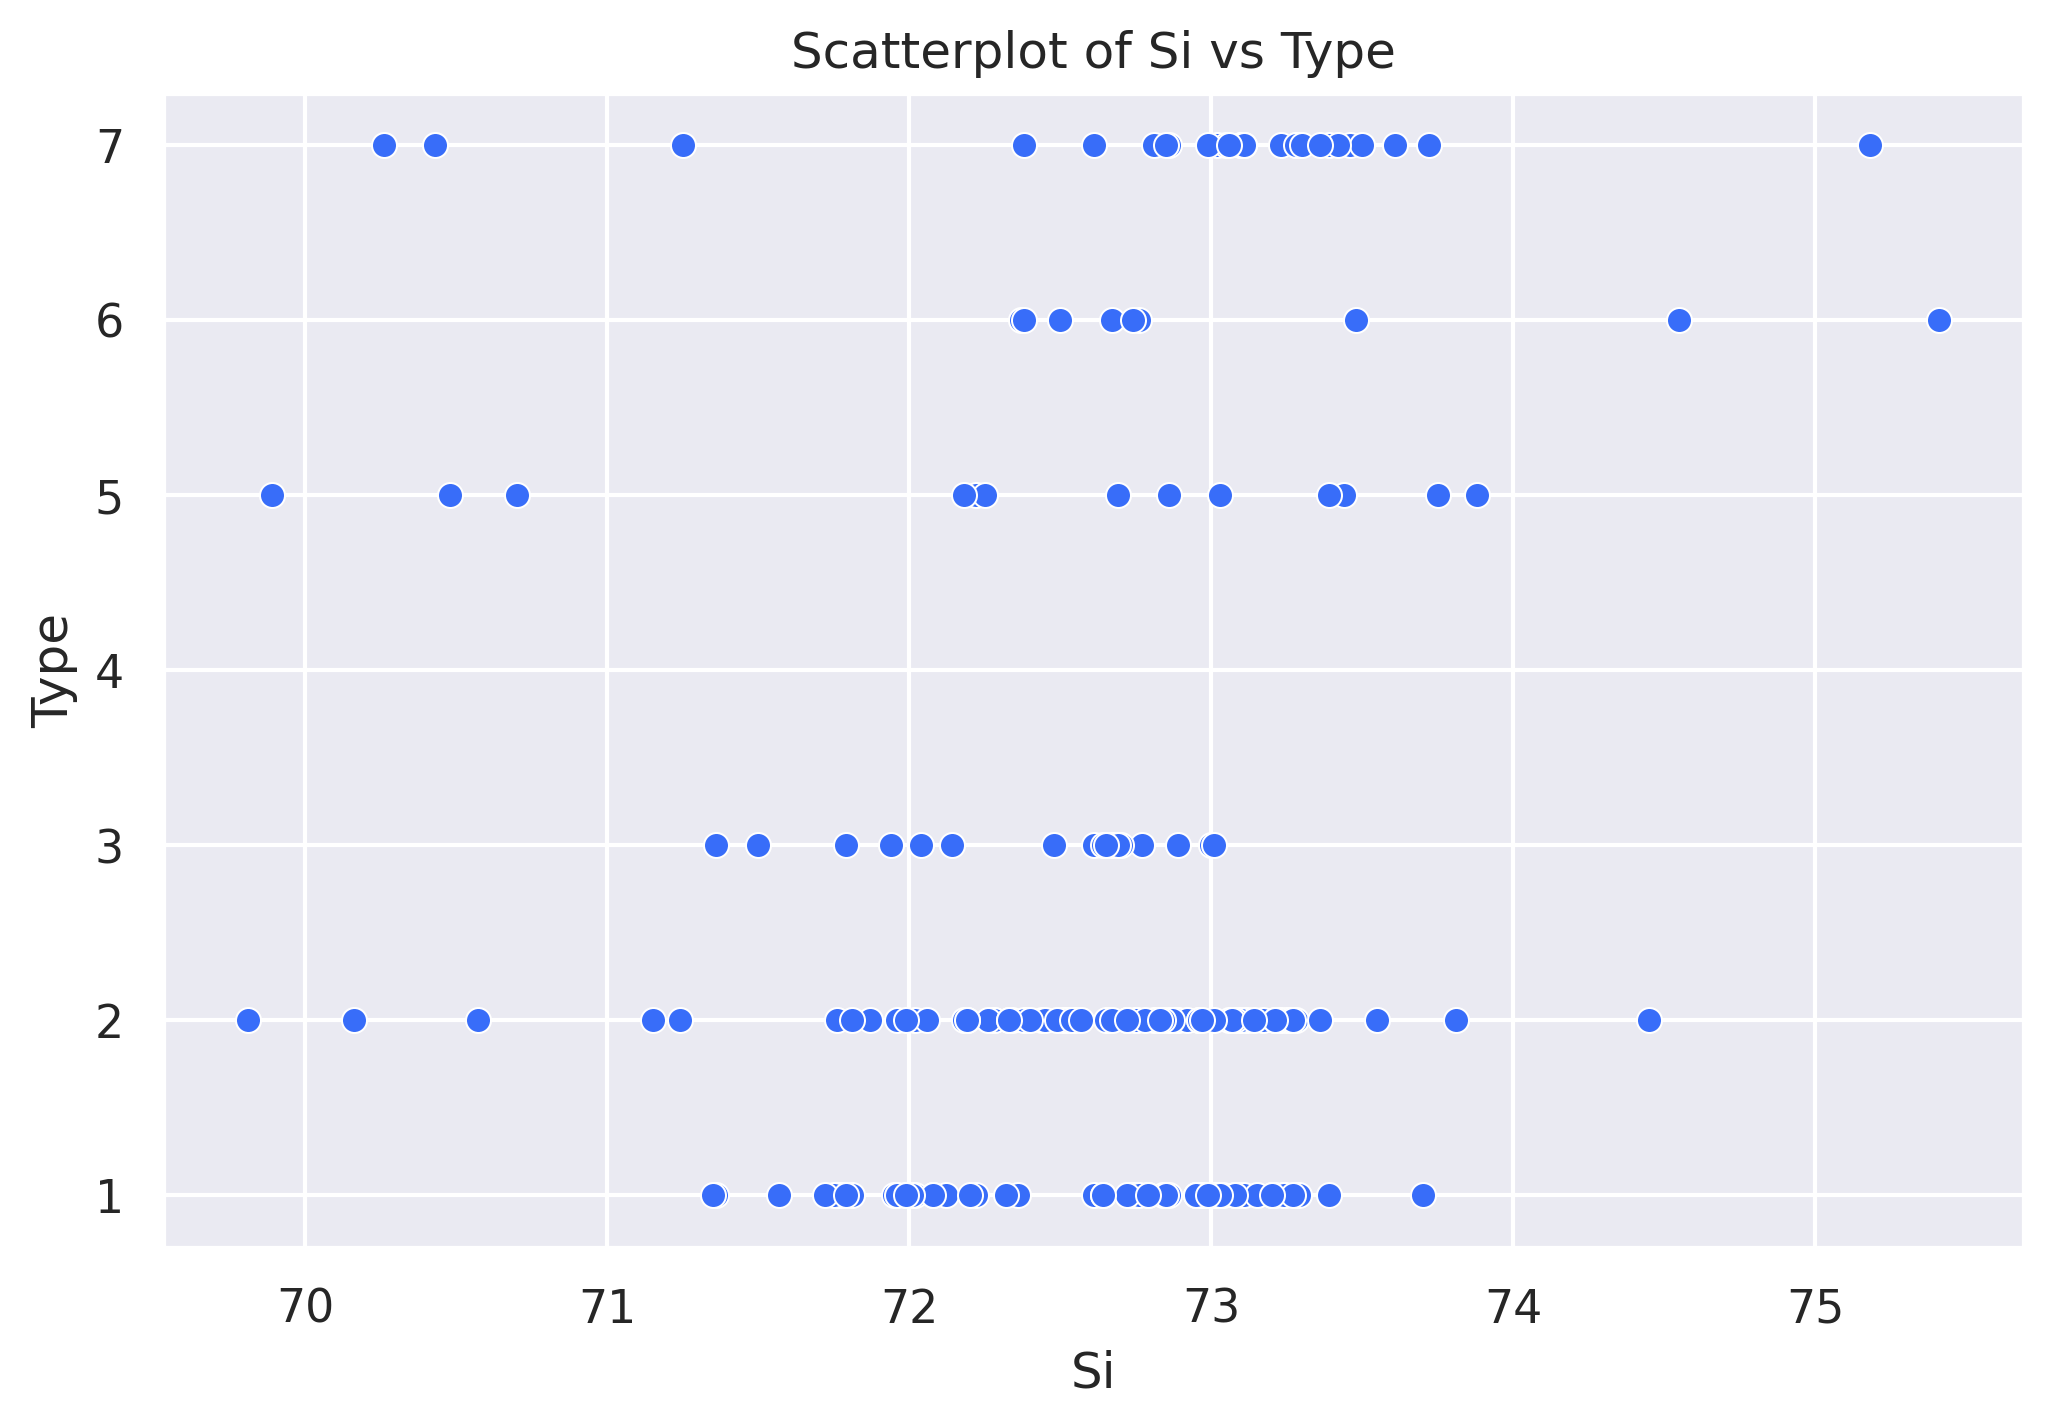

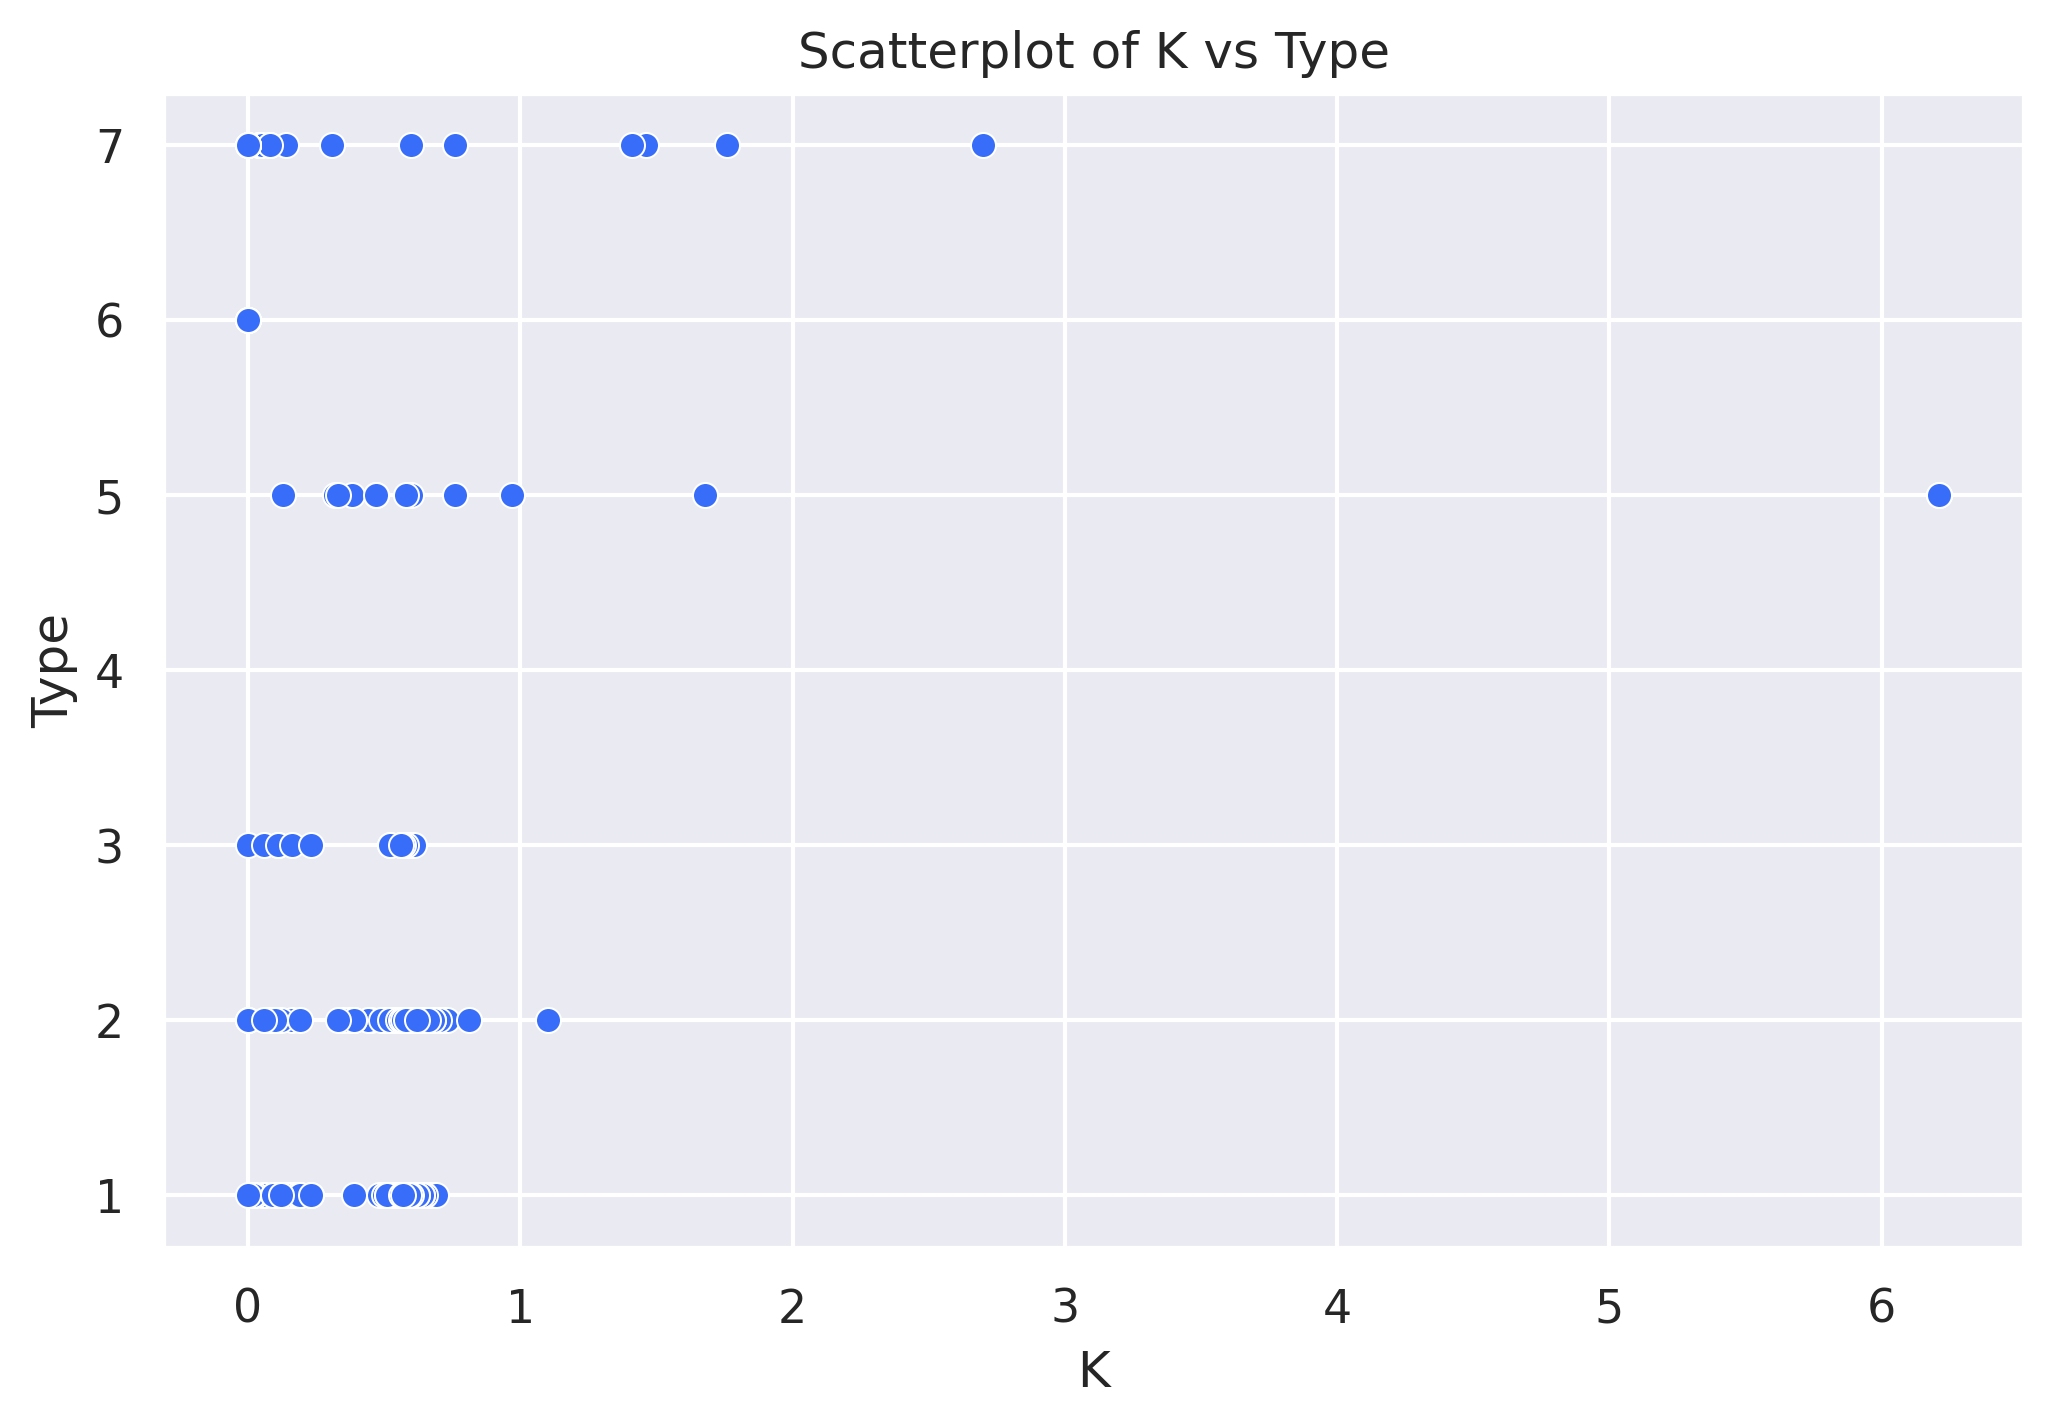

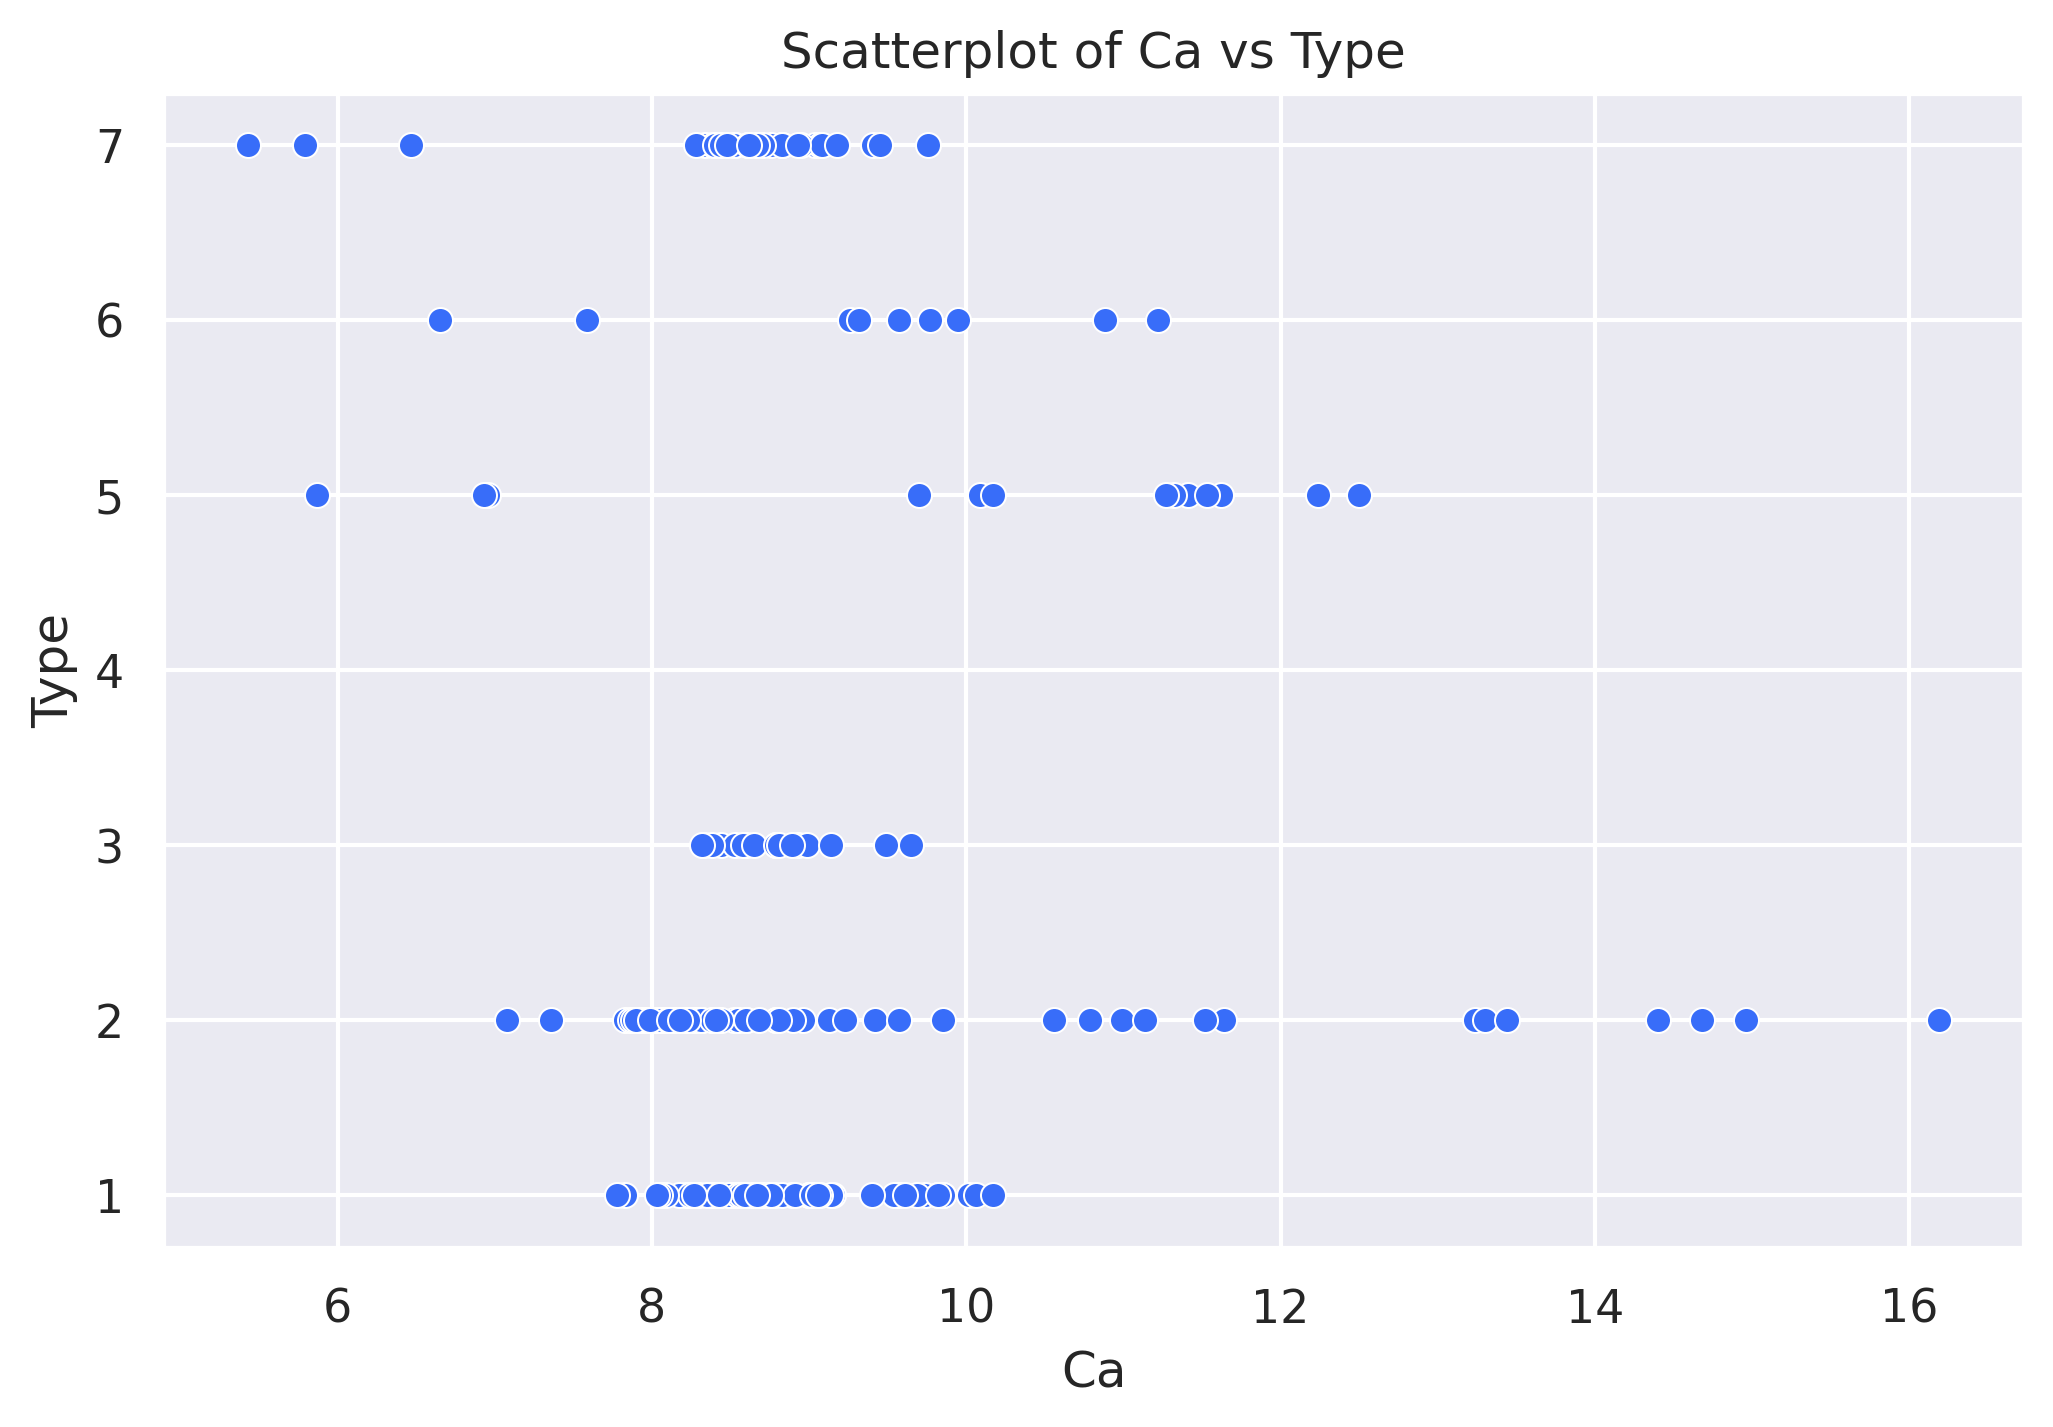

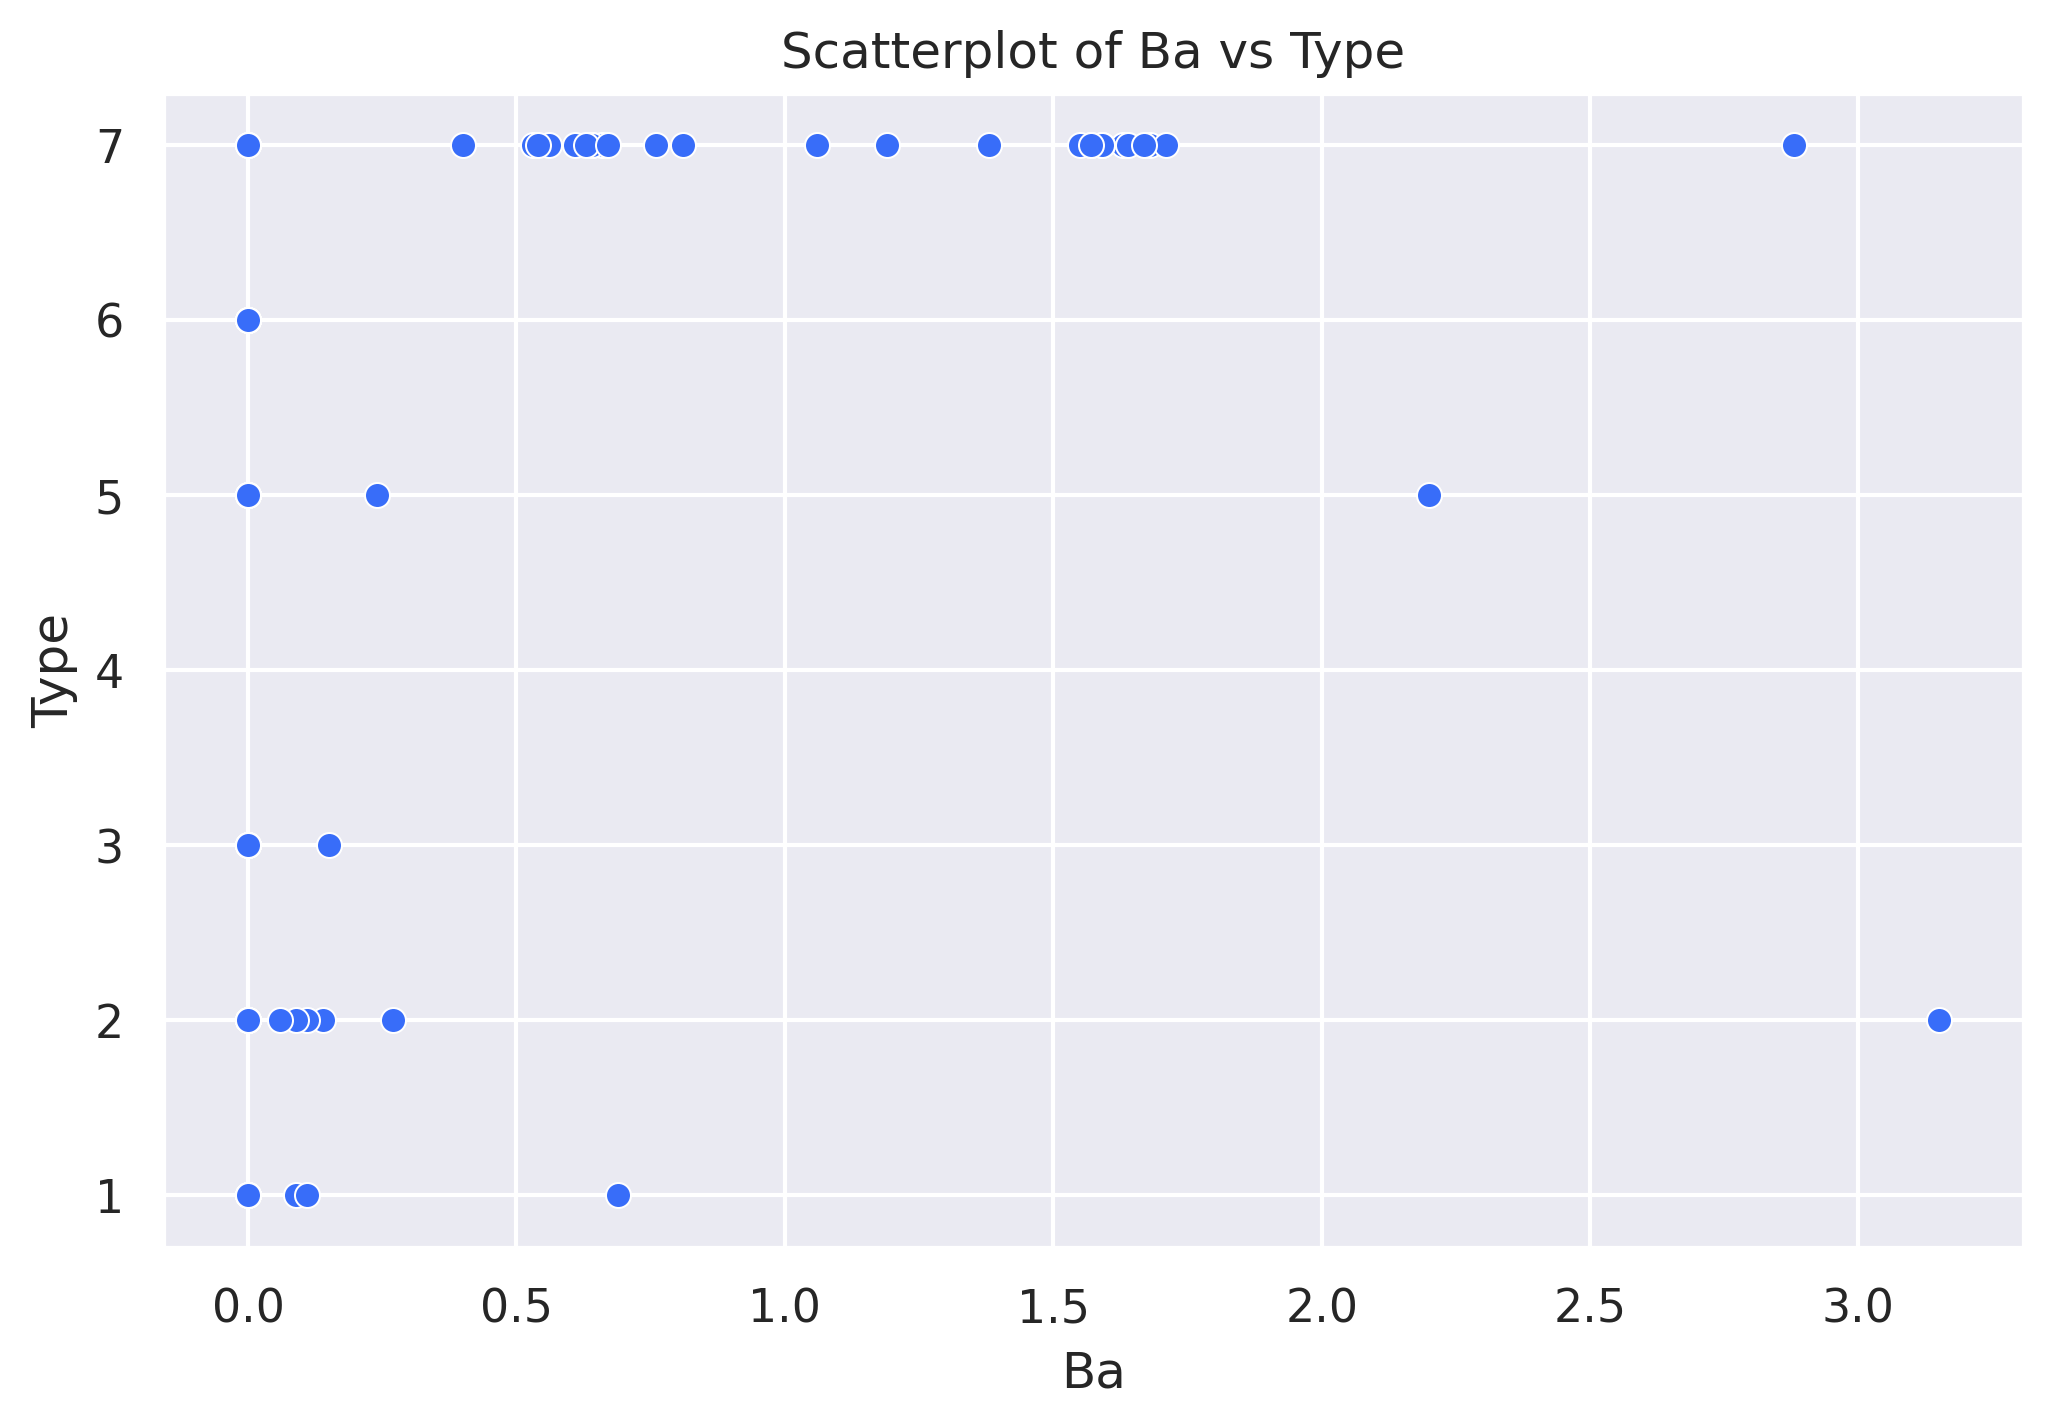

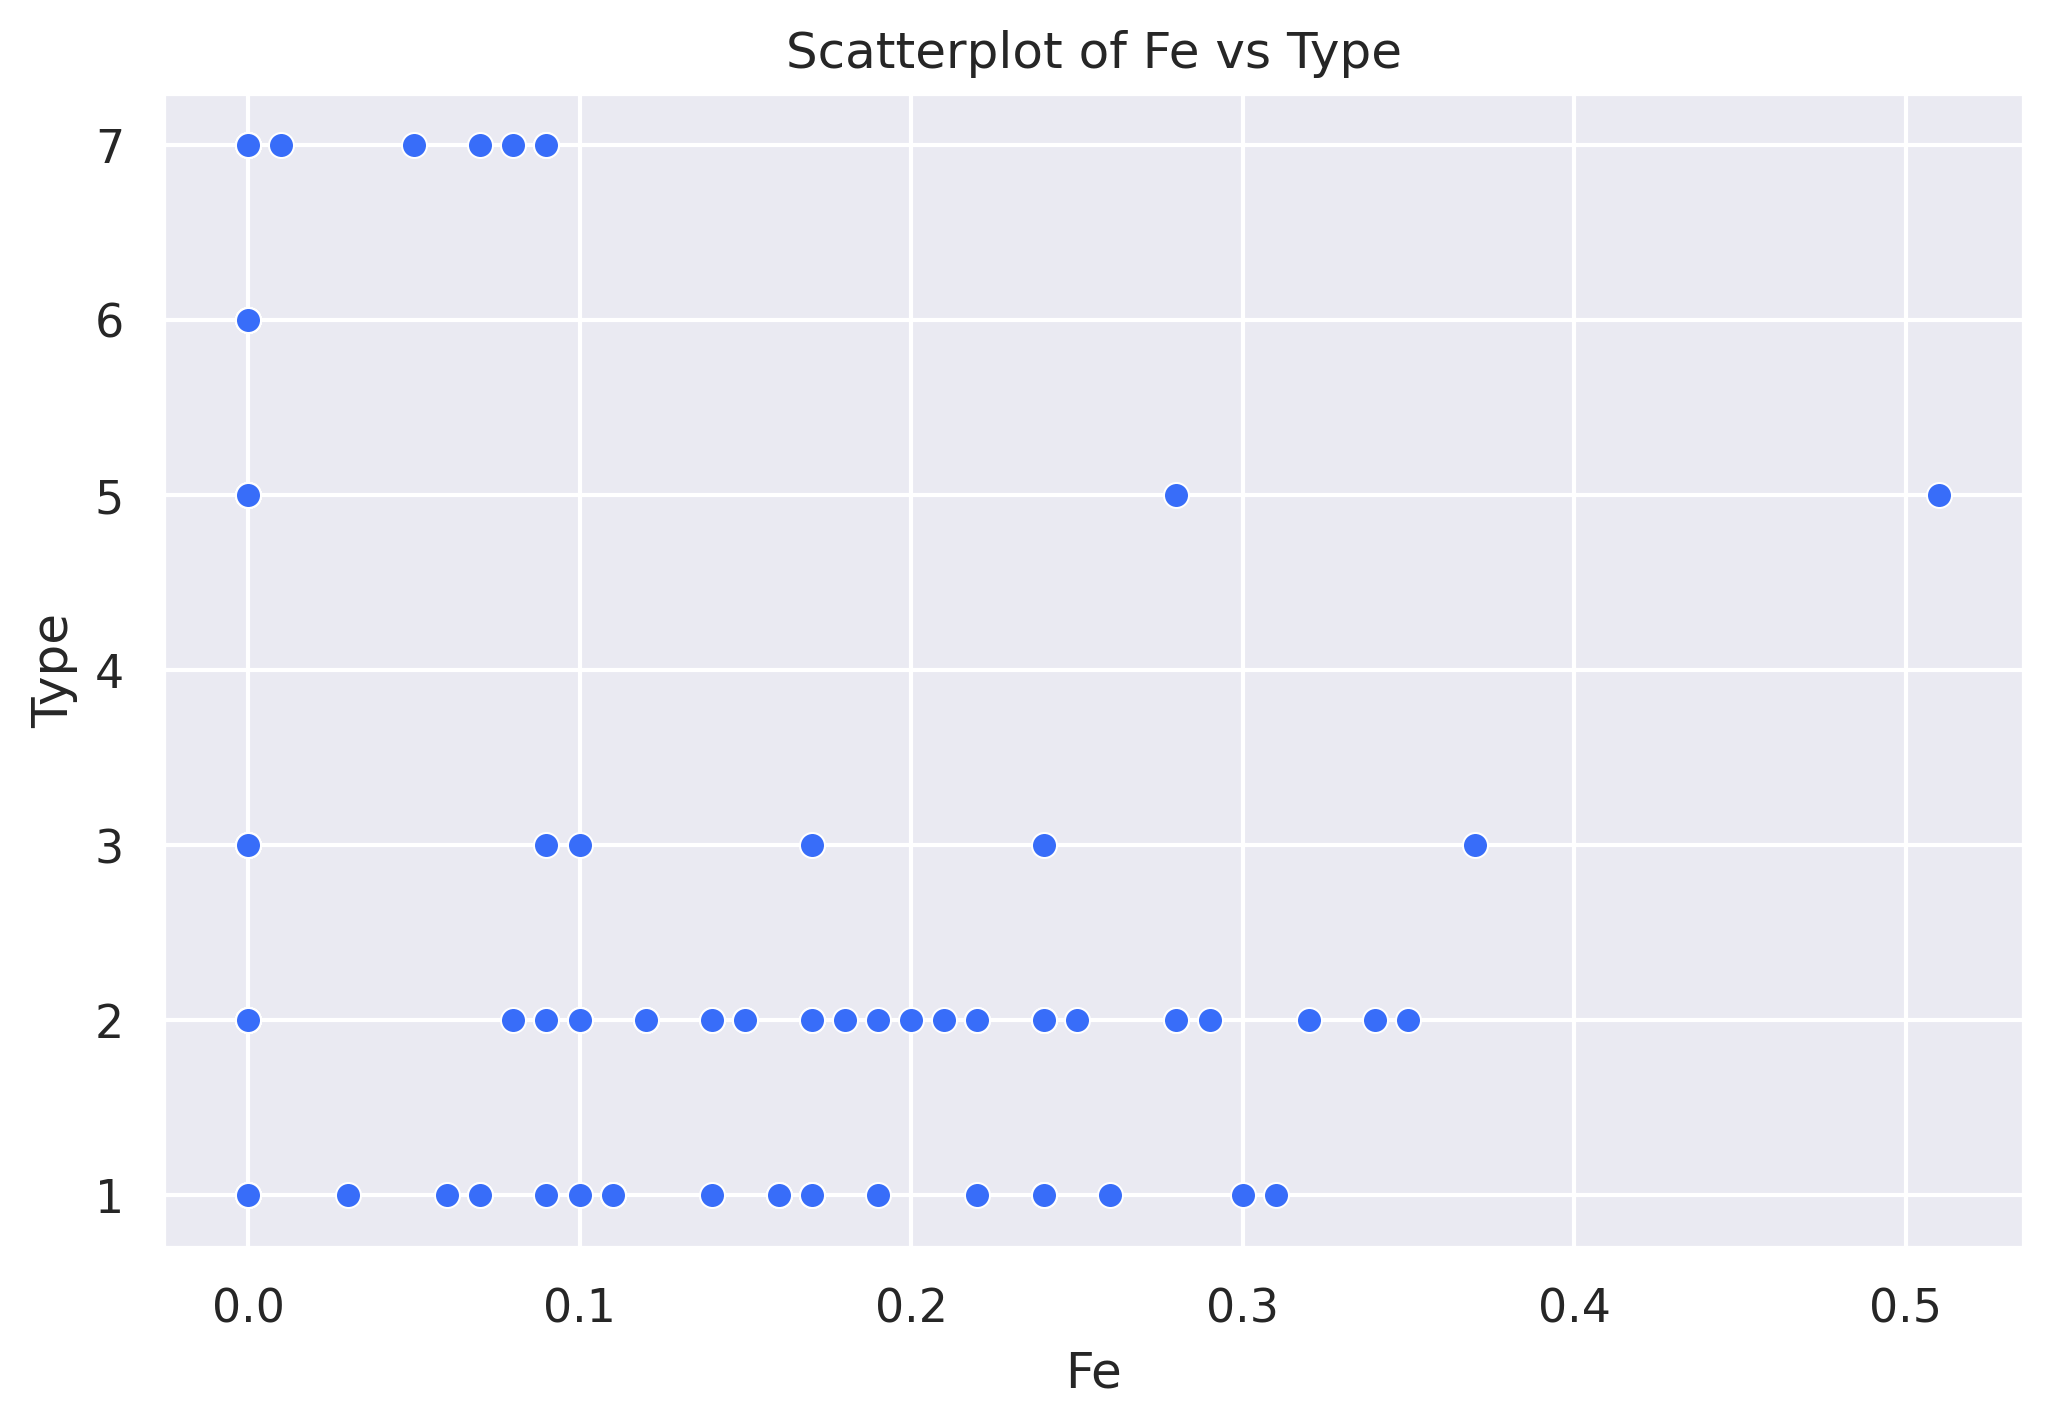

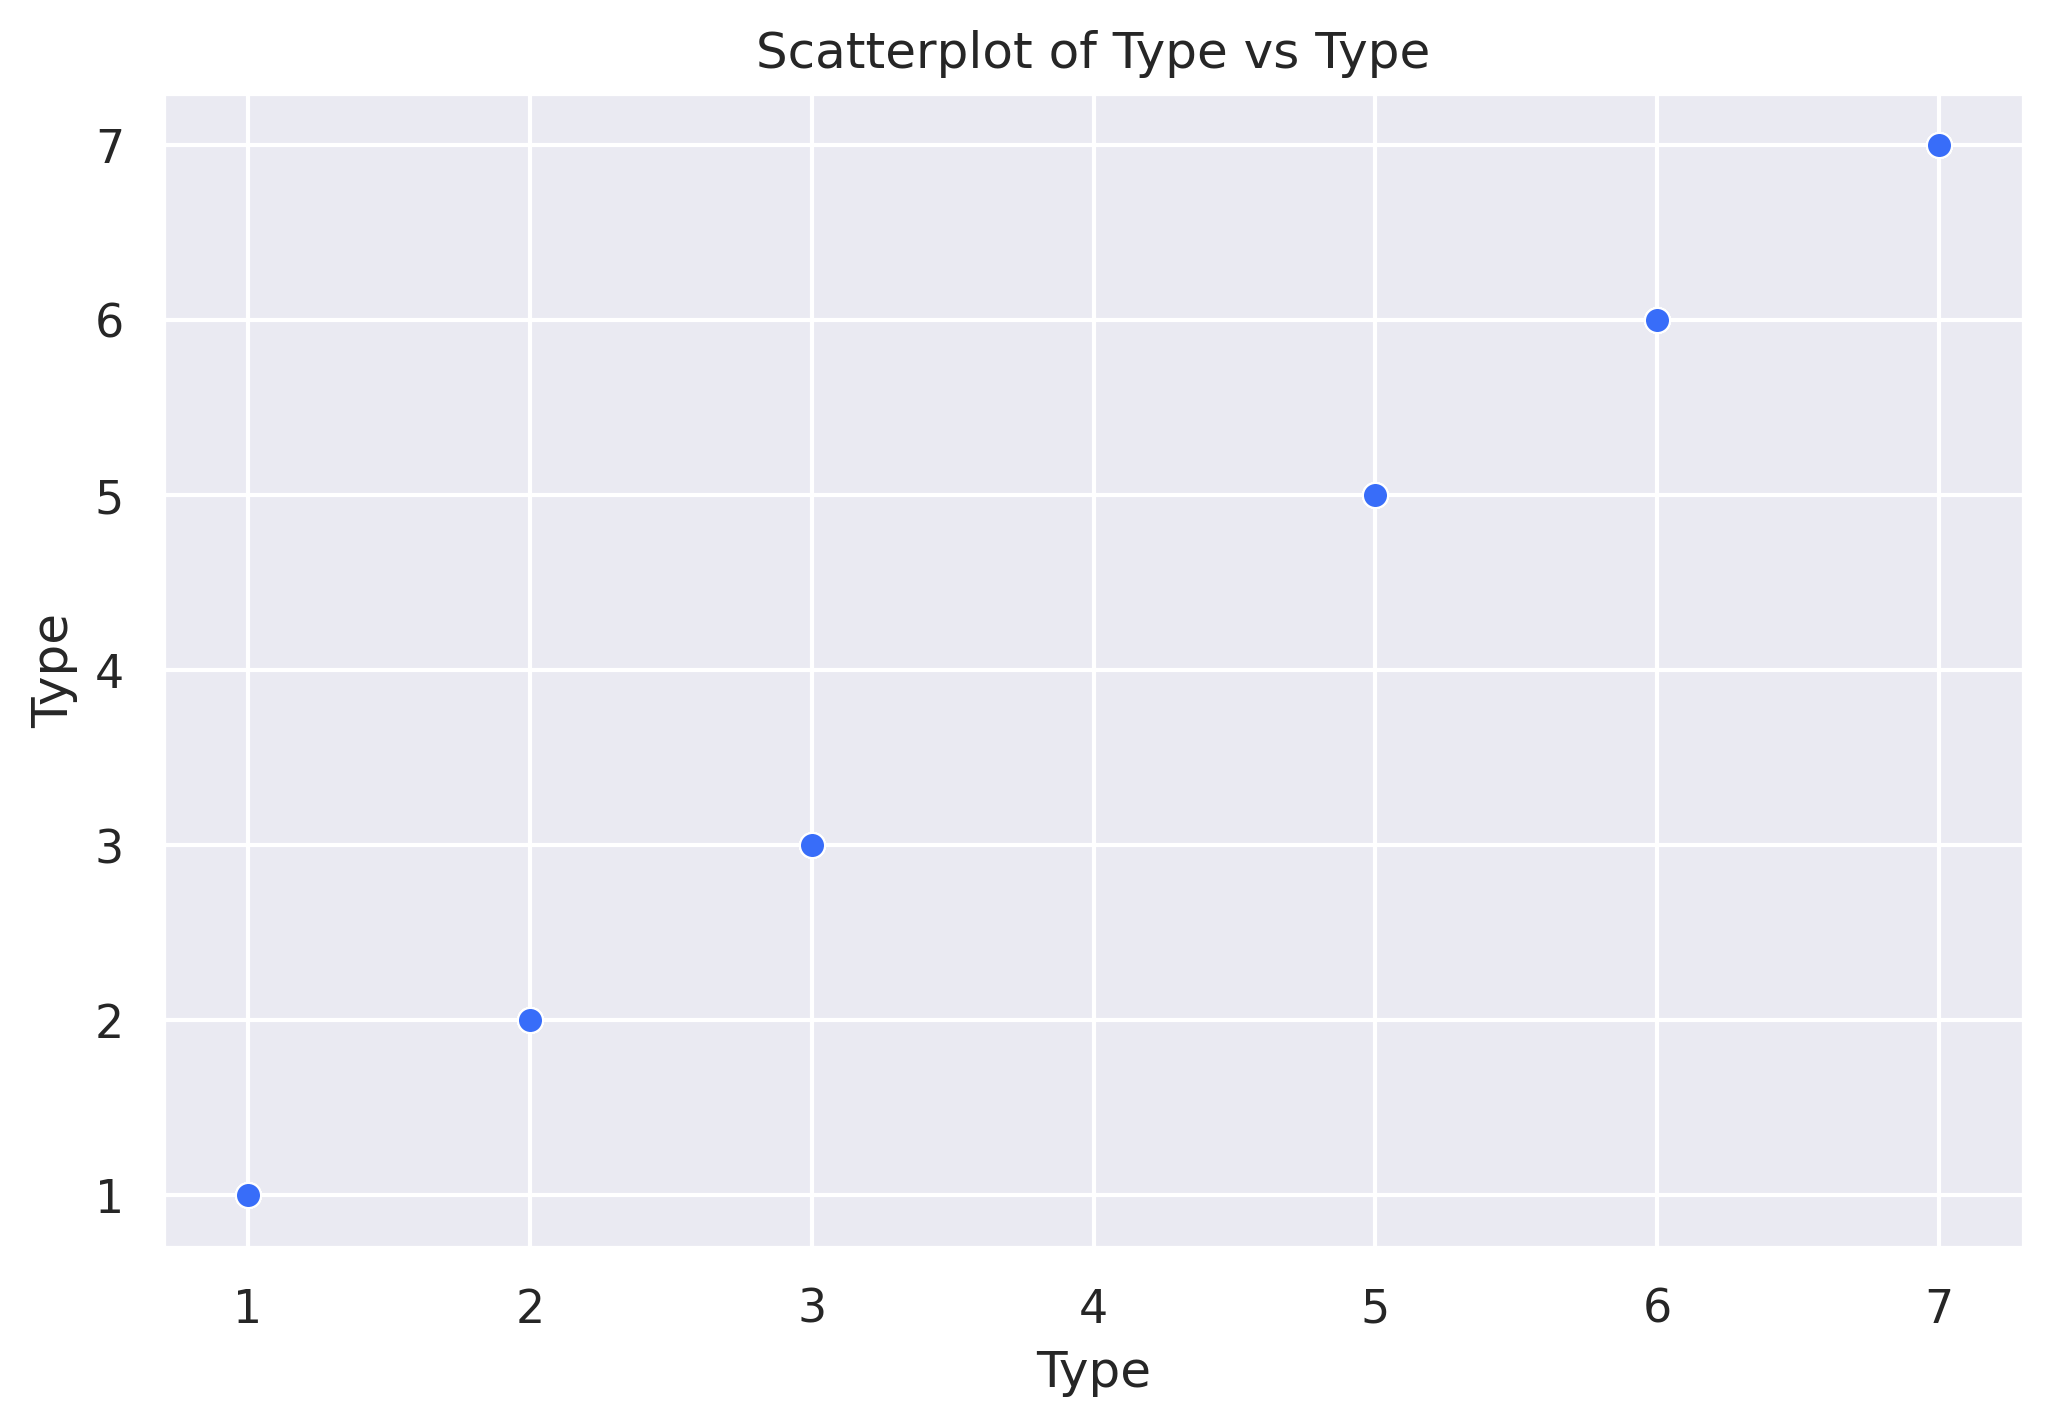

In [10]:
# Loop through the list and create scatterplots
for i in variables_to_plot:
    sns.scatterplot(data=df, x=i, y='Type')
    plt.title(f'Scatterplot of {i} vs Type')
    plt.show()

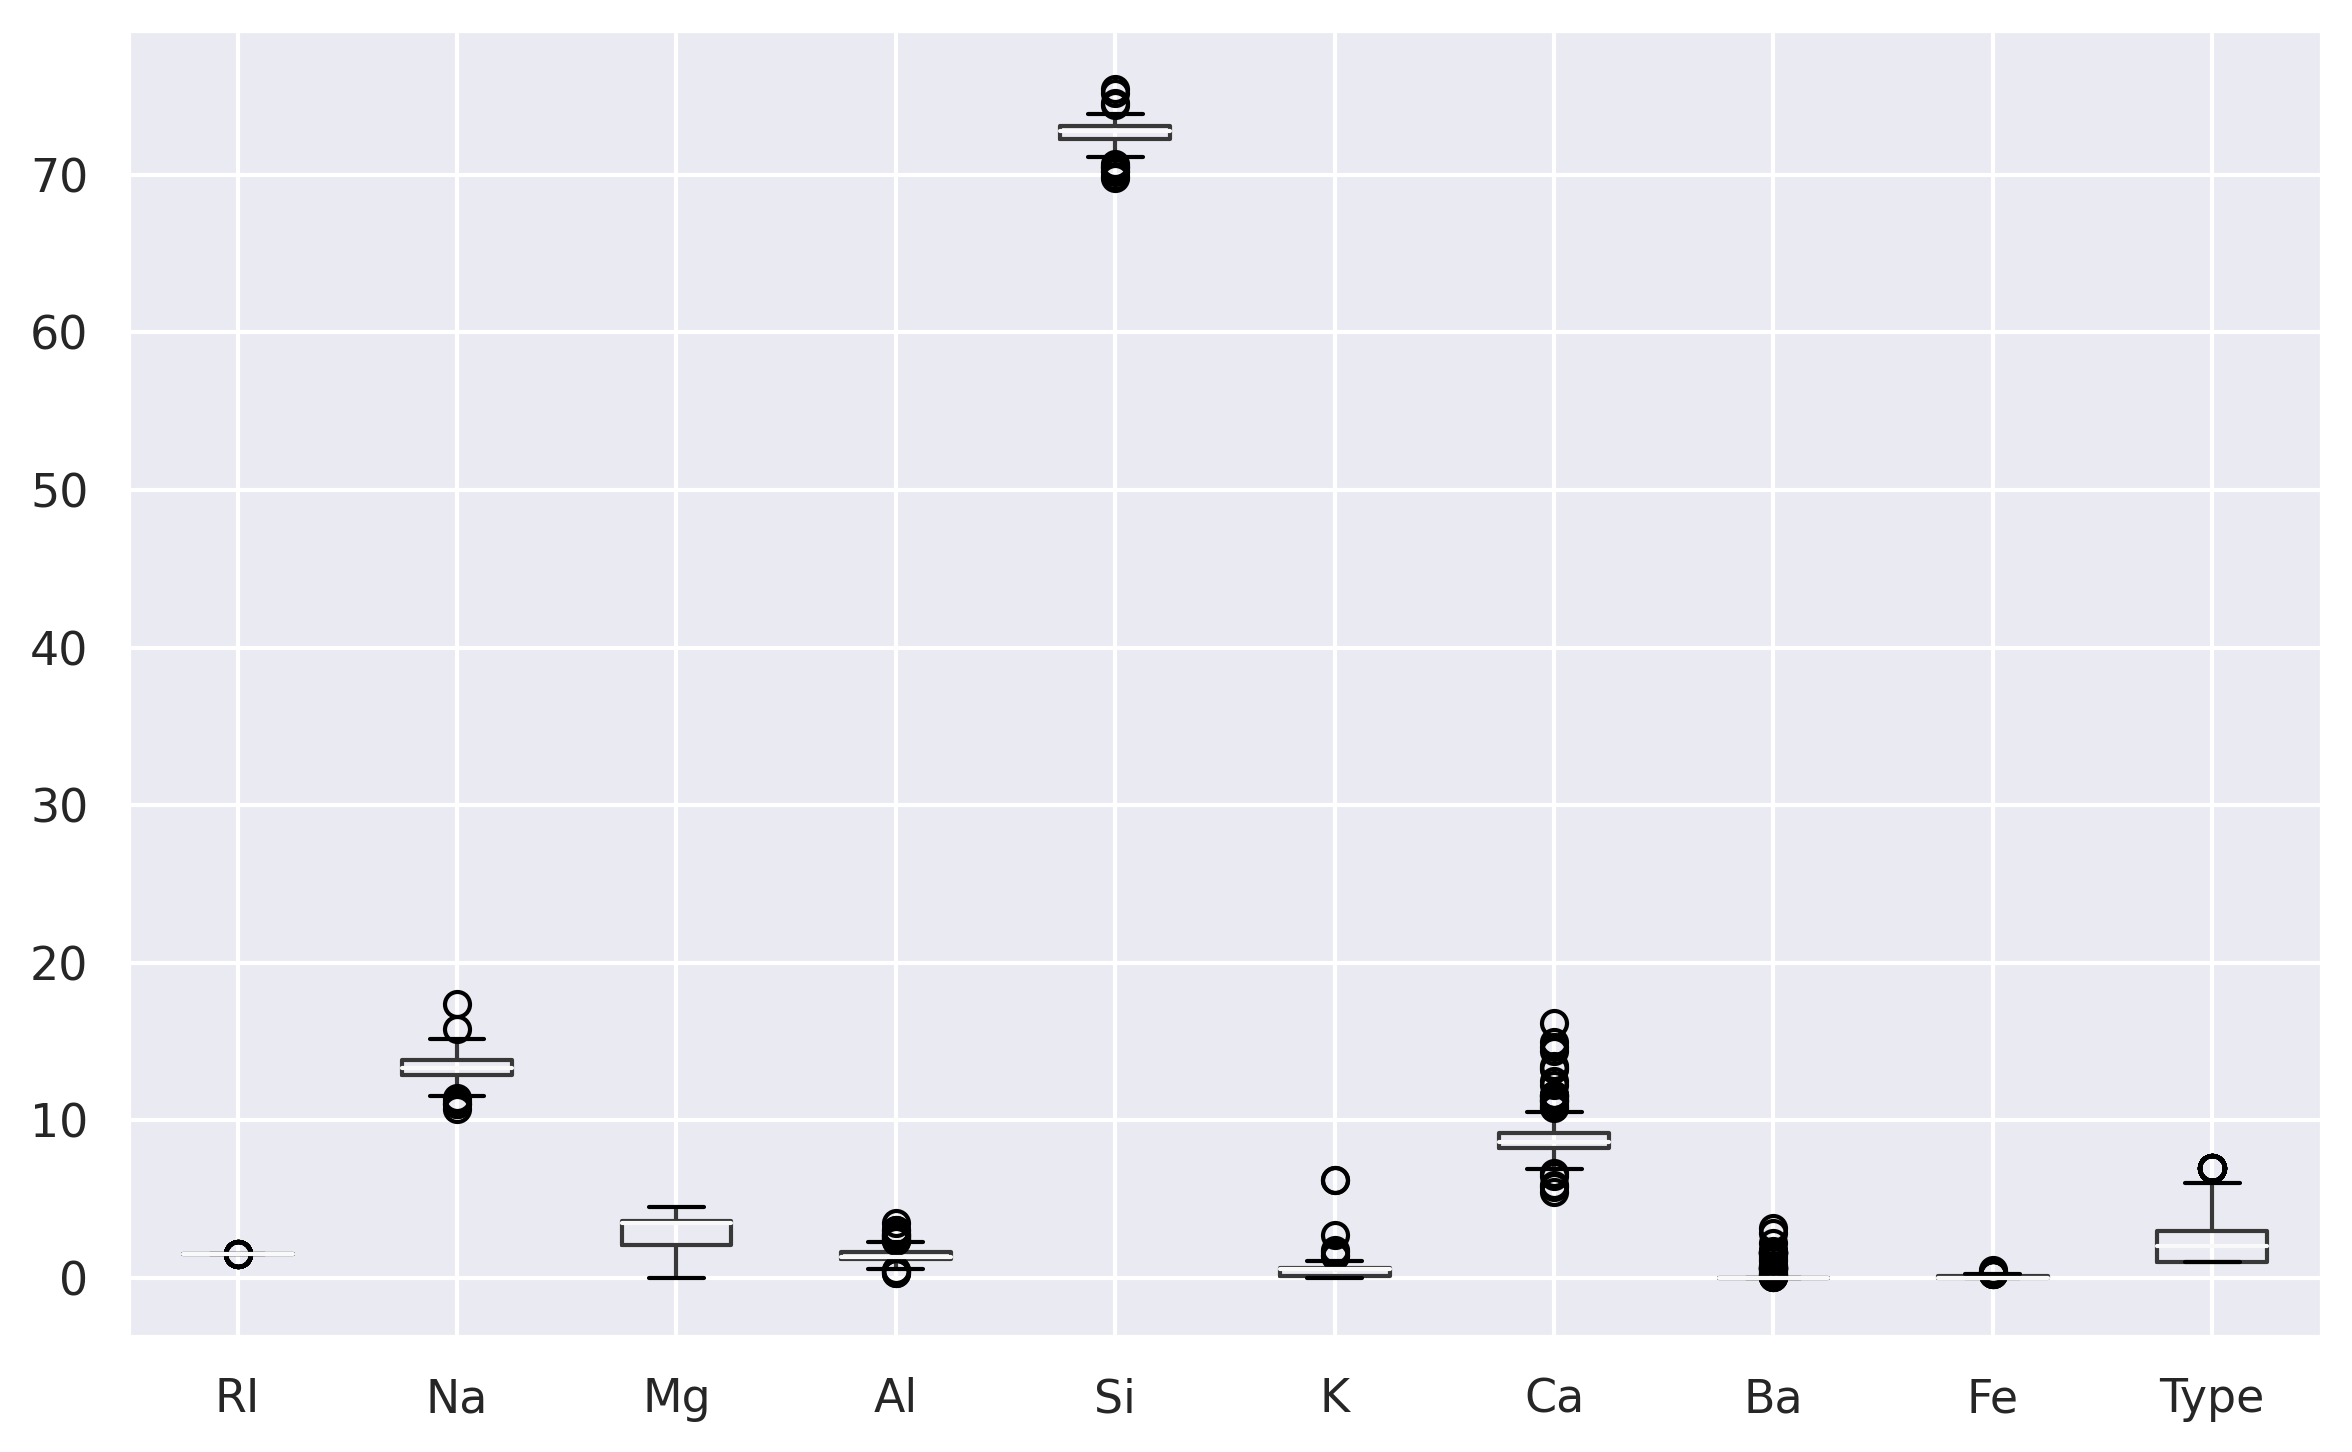

In [11]:
df.boxplot()
plt.tight_layout()

# for delete outliers

In [14]:
import numpy as np
def calculate_whisker(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

# Loop through the list and replace outliers
for i in ['RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']:
    lw, uw = calculate_whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])


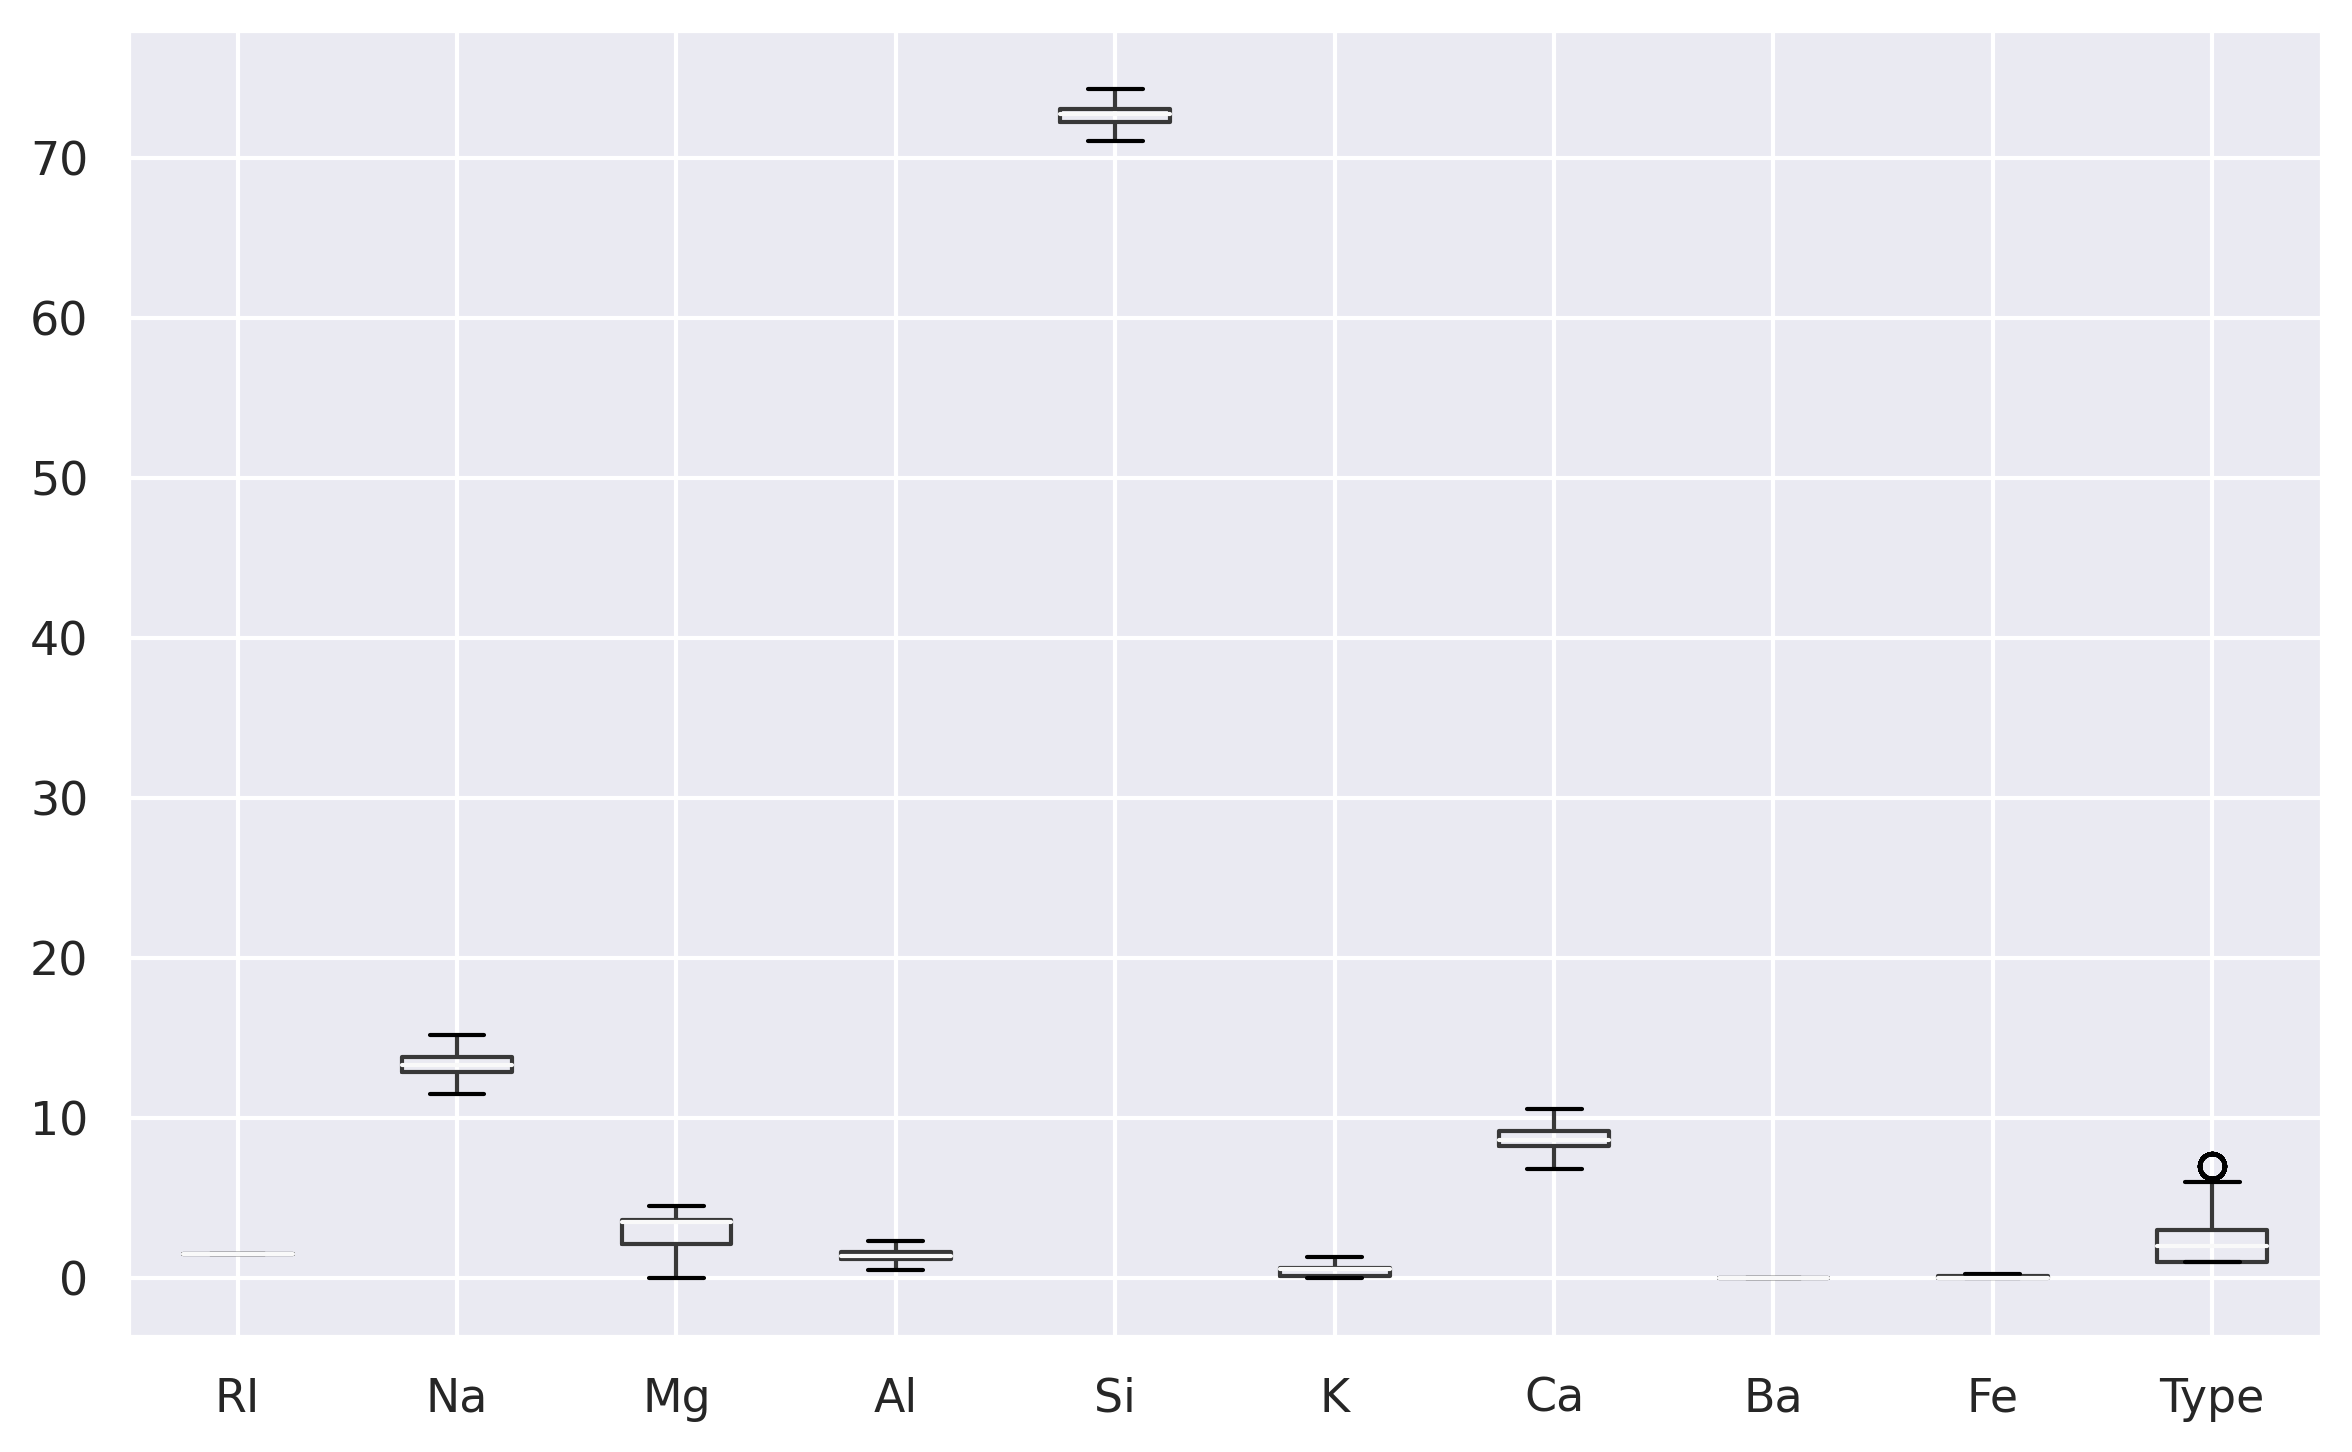

In [16]:
df.boxplot()
plt.tight_layout()

#model building

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [18]:
x = df.iloc[:,:-1]
y = df['Type']

In [19]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [21]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.8421052631578947, 0.6744186046511628)

#hyperparameter tuning

In [30]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [31]:
train_acc

[1.0,
 0.8362573099415205,
 0.8421052631578947,
 0.8011695906432749,
 0.7894736842105263,
 0.7660818713450293,
 0.7251461988304093,
 0.7309941520467836,
 0.7076023391812866,
 0.6783625730994152,
 0.6842105263157895,
 0.672514619883041,
 0.6783625730994152,
 0.6666666666666666,
 0.6374269005847953,
 0.6140350877192983,
 0.6257309941520468,
 0.6198830409356725,
 0.6198830409356725]

In [32]:
test_acc

[0.6976744186046512,
 0.7209302325581395,
 0.6744186046511628,
 0.627906976744186,
 0.6511627906976745,
 0.6976744186046512,
 0.6744186046511628,
 0.6744186046511628,
 0.6511627906976745,
 0.6511627906976745,
 0.627906976744186,
 0.6511627906976745,
 0.5813953488372093,
 0.6744186046511628,
 0.6511627906976745,
 0.6511627906976745,
 0.6976744186046512,
 0.7209302325581395,
 0.6744186046511628]

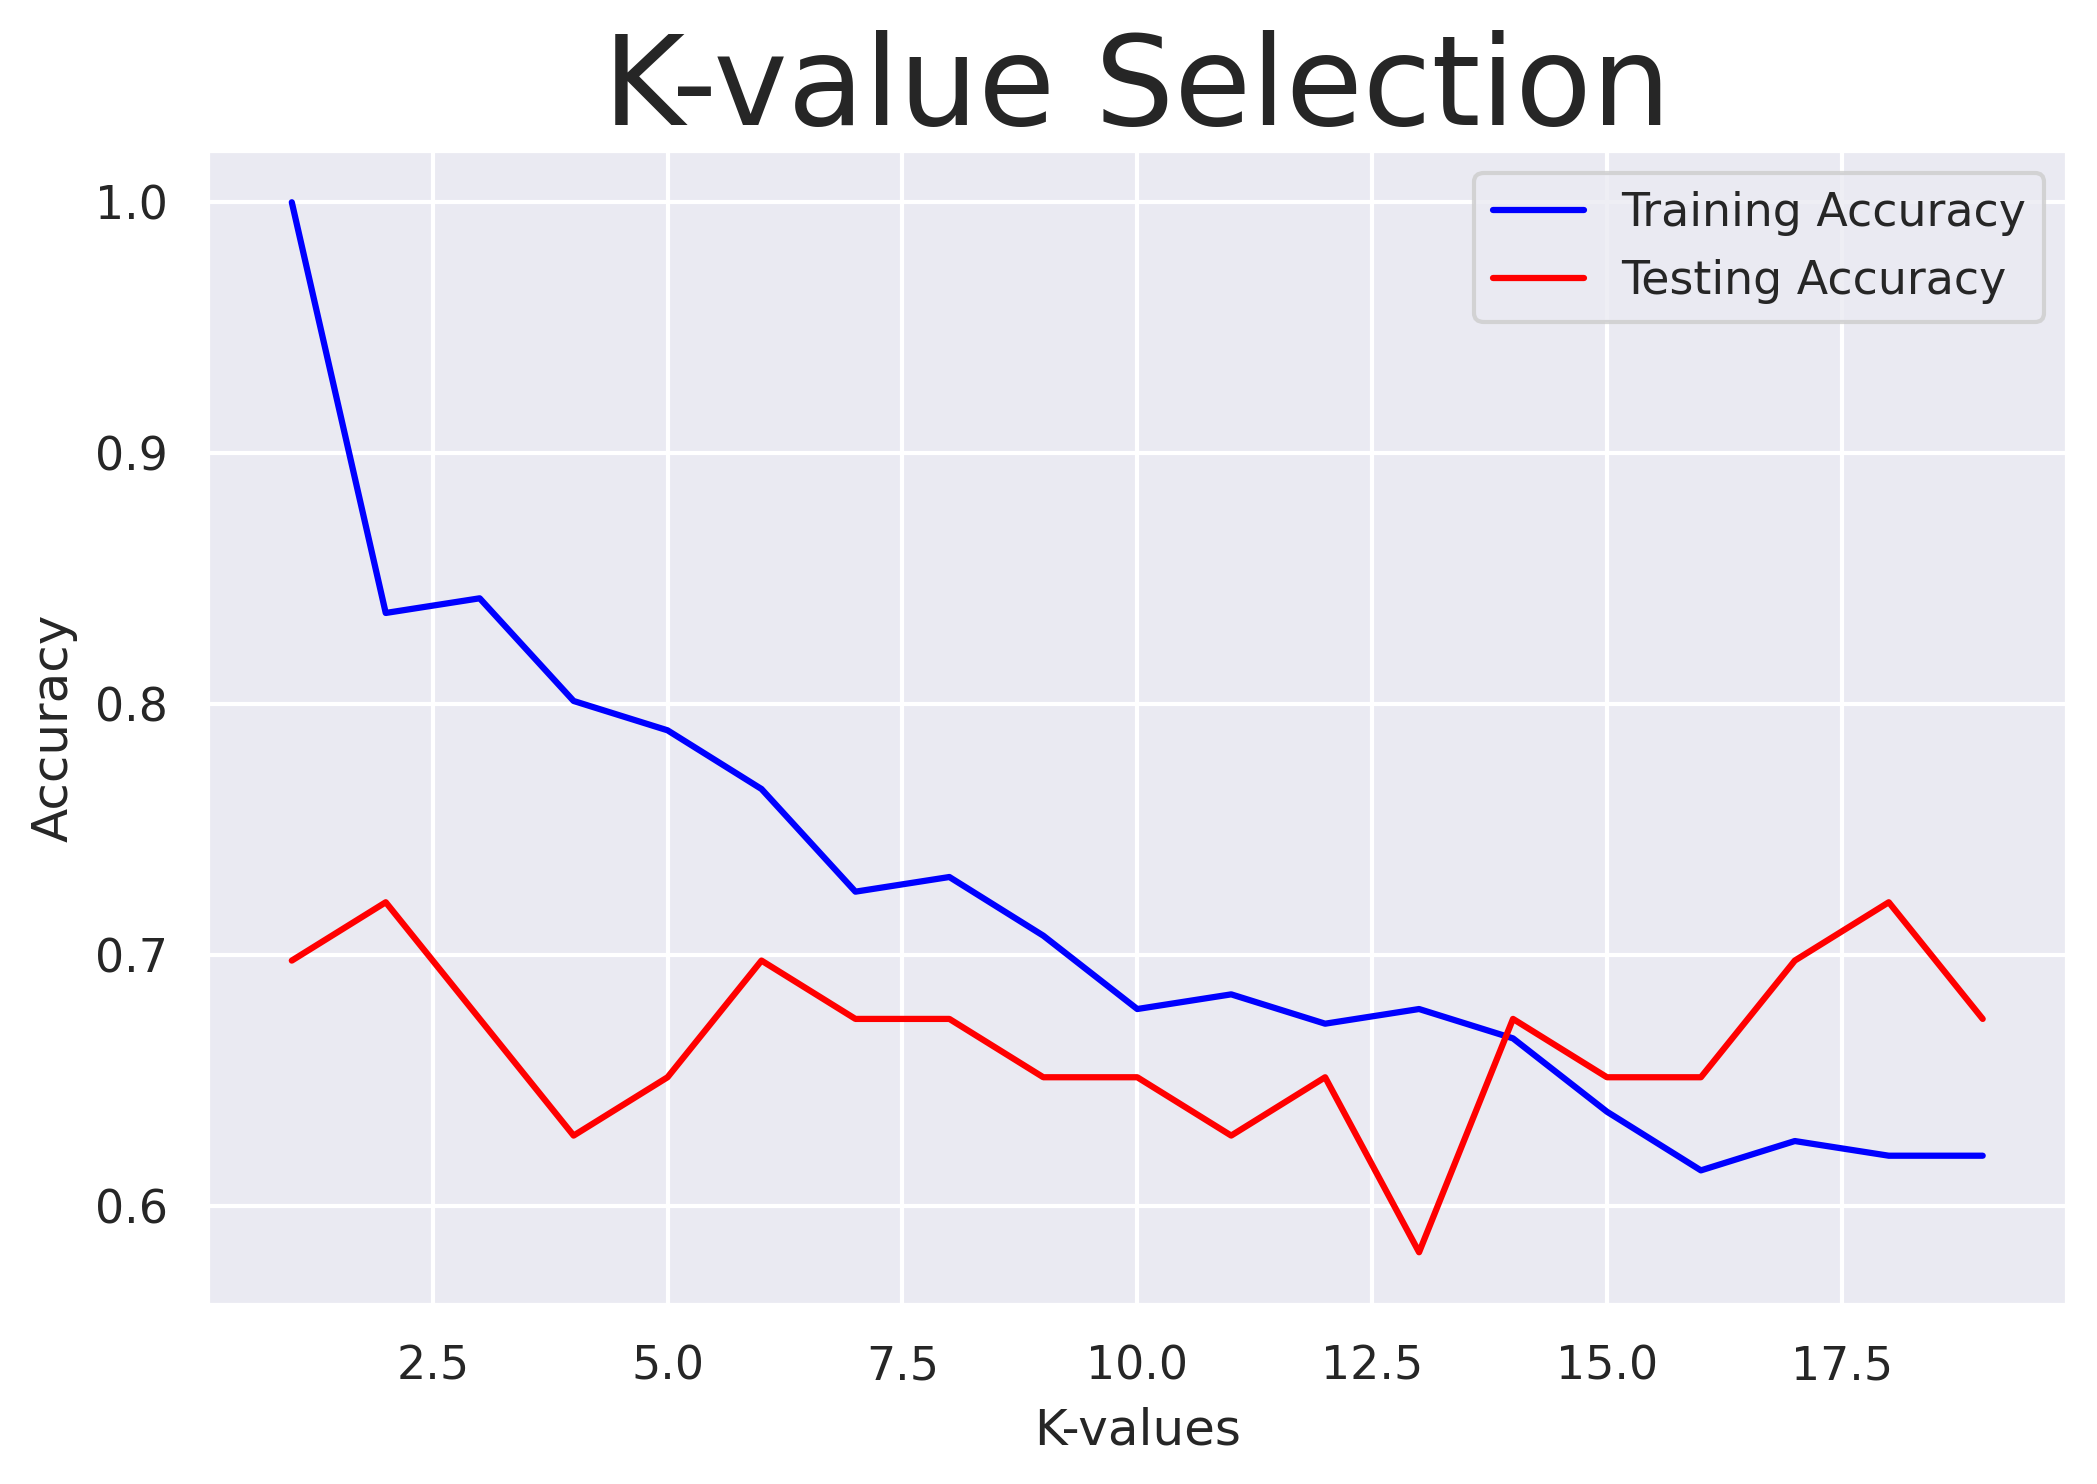

In [38]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection',size = 30)
plt.legend()

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [44]:
# Separate features and target variable
x = df.iloc[:, :-1]
y = df['Type']

In [45]:
# Feature Scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [46]:
# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [47]:
# Hyperparameter Tuning
param_grid = {'n_neighbors': range(1, 20)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=14)
grid_search.fit(xtrain, ytrain)
best_knn = grid_search.best_estimator_
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 1}


In [49]:
# Train the final model with the best parameters
best_knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [50]:
# Predictions and Evaluation
ypred = best_knn.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.78      0.74      0.76        19
           2       0.73      0.67      0.70        12
           3       0.40      0.33      0.36         6
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         1
           7       0.80      1.00      0.89         4

    accuracy                           0.70        43
   macro avg       0.62      0.79      0.67        43
weighted avg       0.70      0.70      0.69        43



In [53]:
# Evaluate with Cross-Validation
cross_val_scores = cross_val_score(best_knn, x, y, cv=5)
print("Cross-Validation Scores:", cross_val_scores)

Cross-Validation Scores: [0.62790698 0.72093023 0.62790698 0.62790698 0.5952381 ]


In [52]:
print(f"Train: {knn.score(xtrain,ytrain)}\nTest: {knn.score(xtest,ytest)}")

Train: 0.6666666666666666
Test: 0.6744186046511628
